In [1]:
import uproot, glob
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob, pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
import scipy
from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-j3ao_40u because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='../analysis_run3/AN_Note_Plot/regression_with_map'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = True

In [3]:
data_dir ='../analysis_run3/Data_for_plots/mass_regression_test_data/jupyter_notebook_new'

ua_dir = 'ResNet_min_max_scaling_mN1p2To22_chanel_test_m0_22_unbiased_map'
model_dir_ua = ['13_ResNet_map_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2']






### Models trained at UA

13_ResNet_map_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2
13_ResNet_map_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2
keys dict_keys(['m_true', 'm_pred', 'mae', 'mre'])


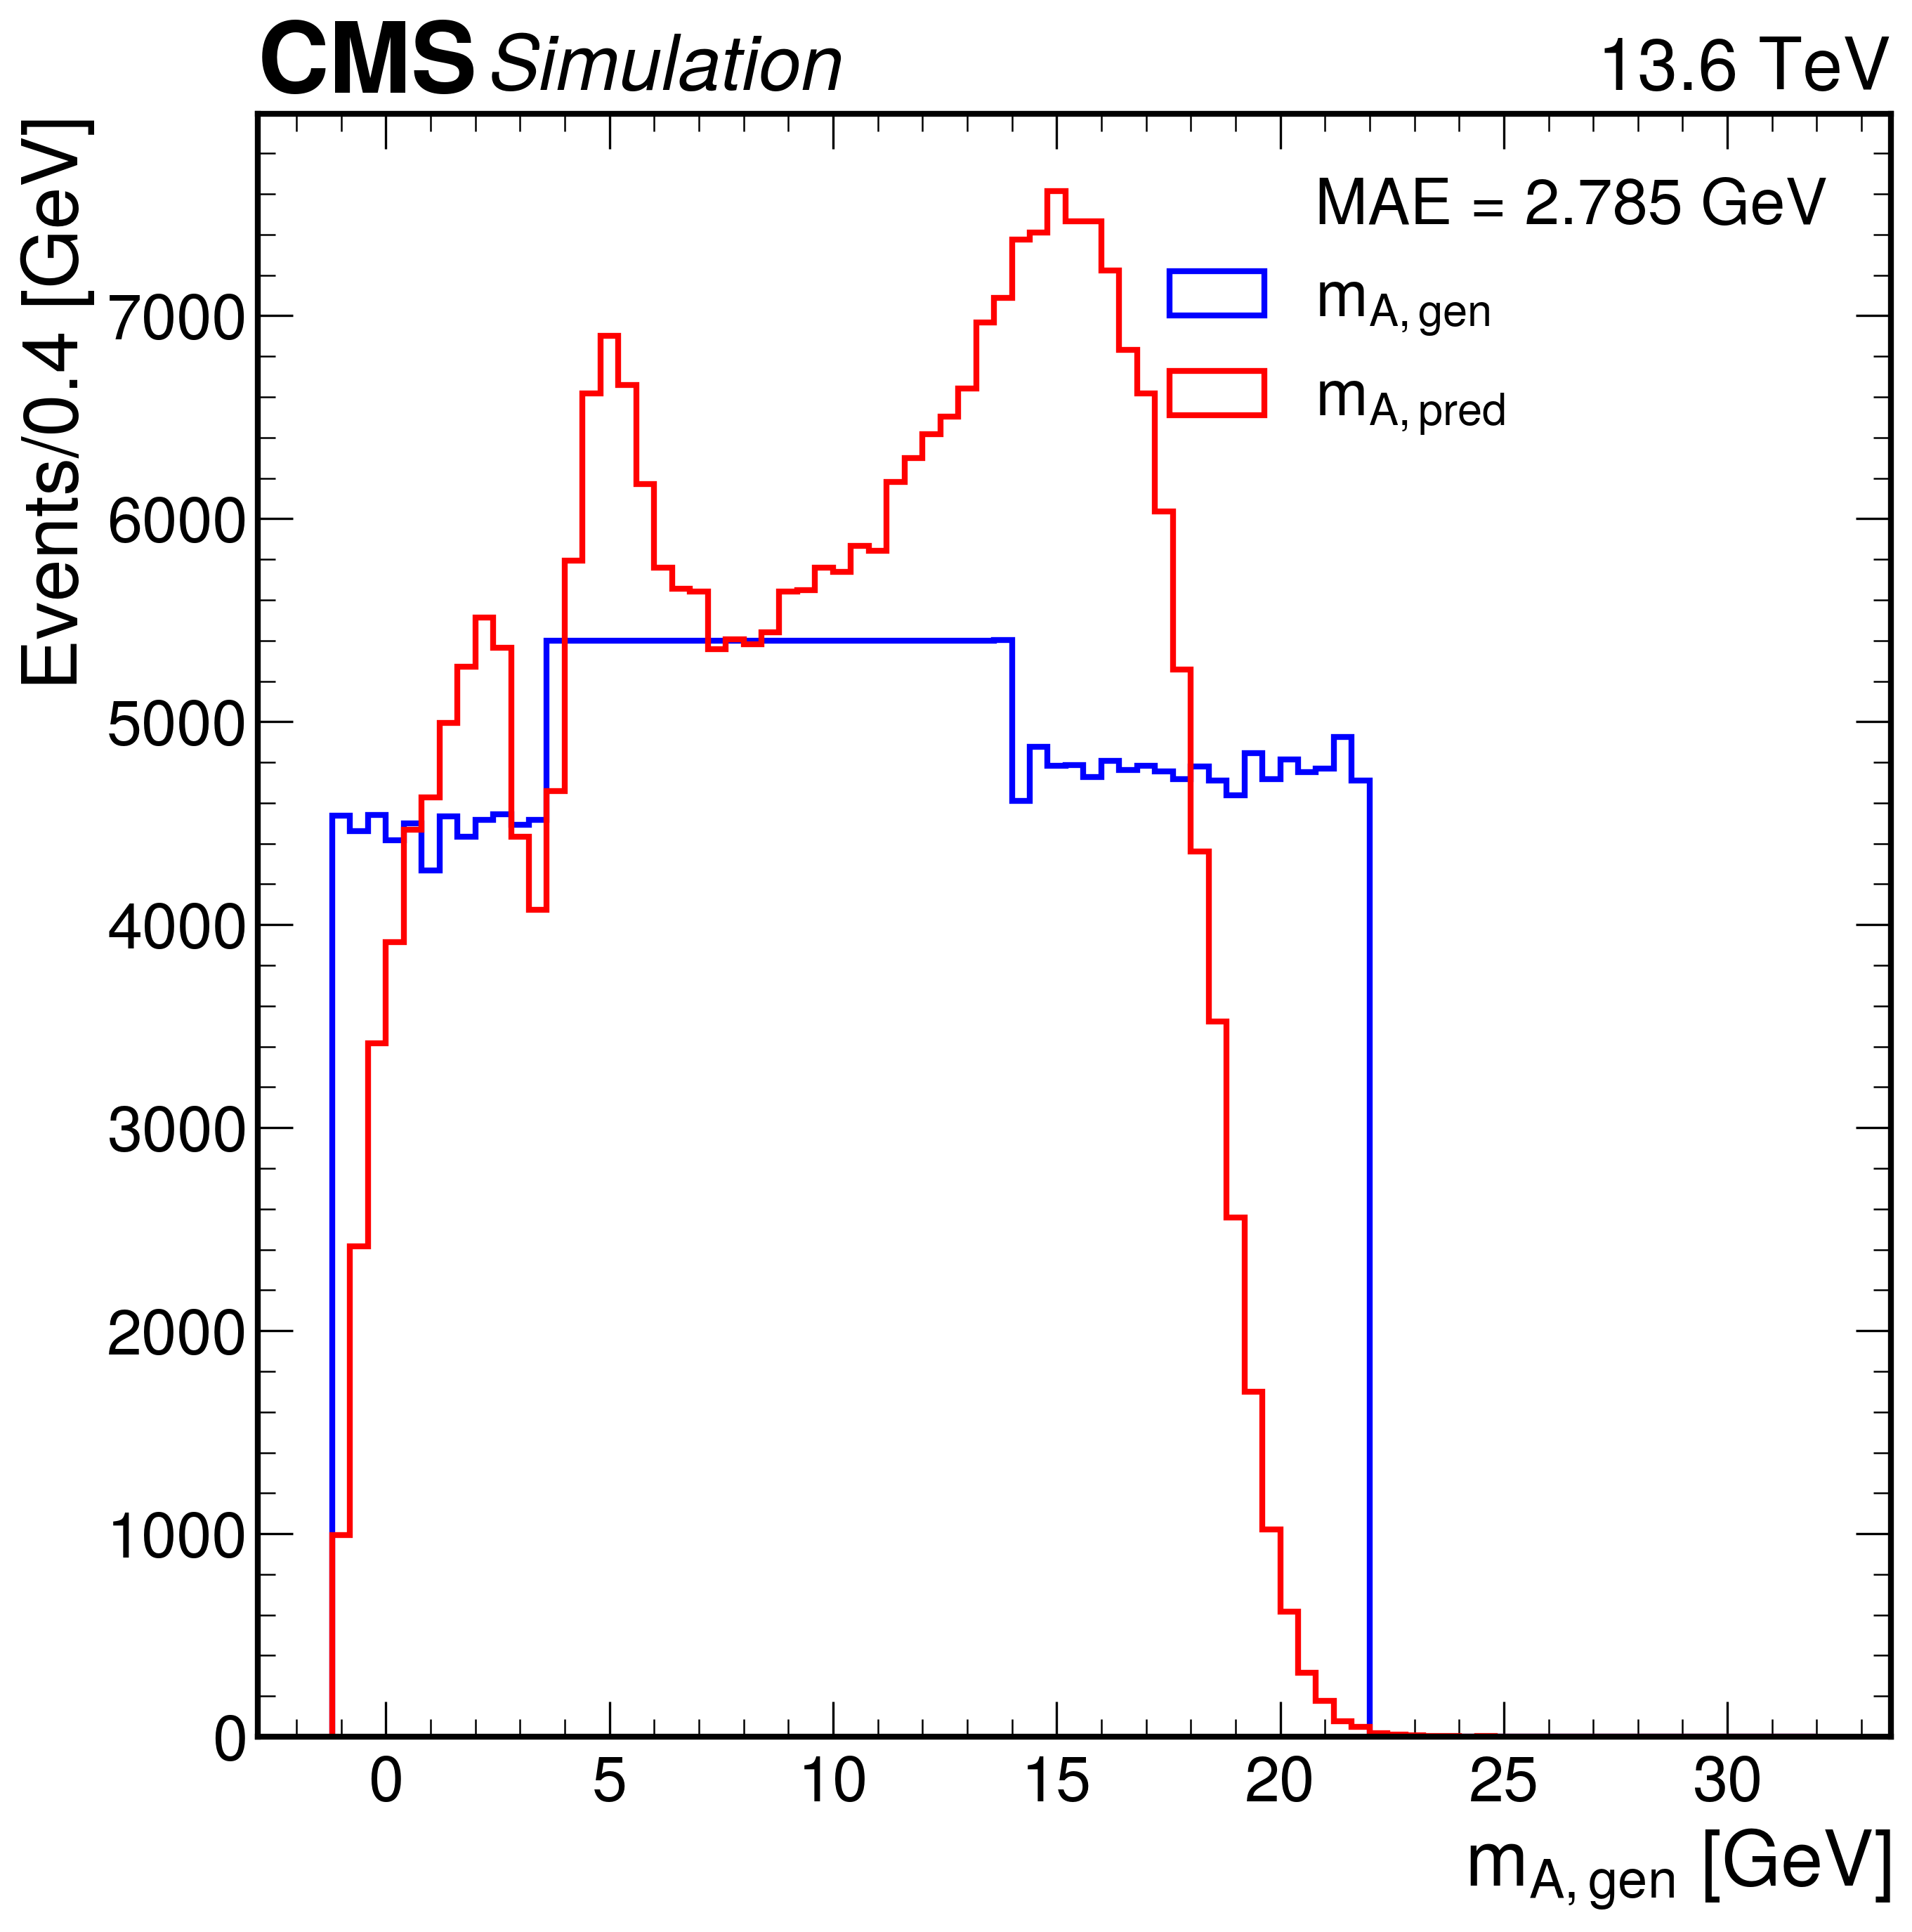

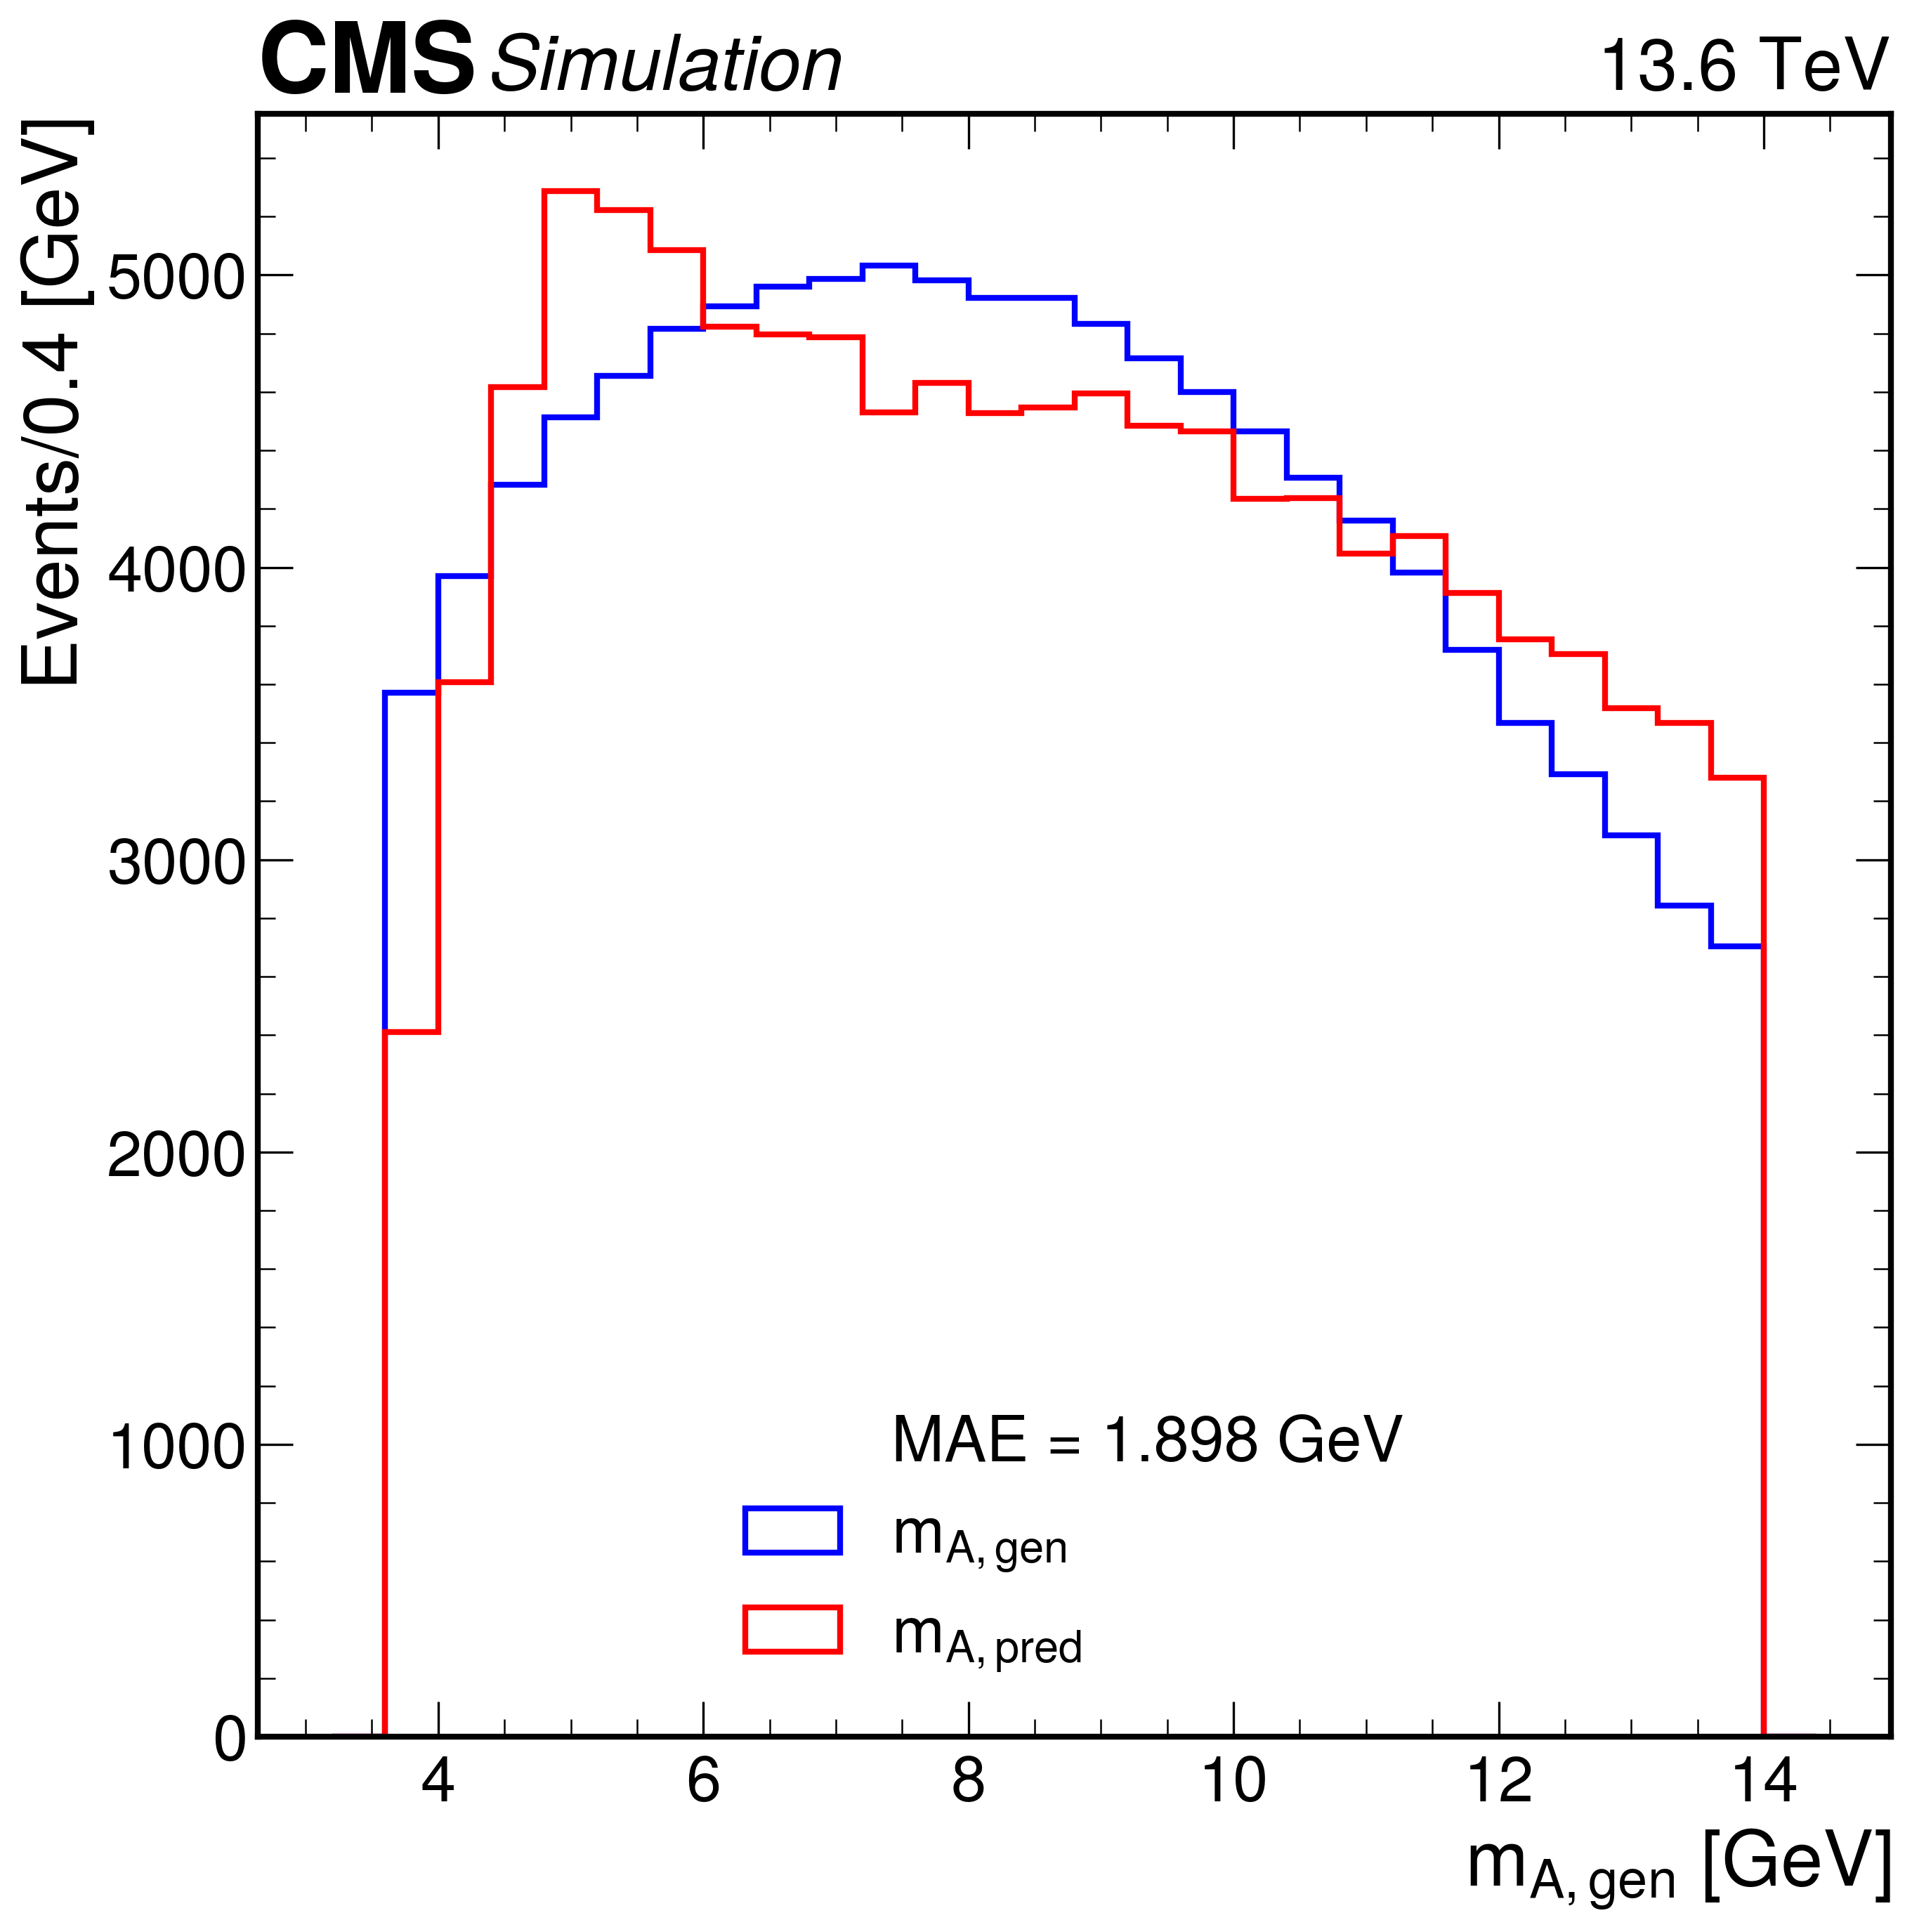

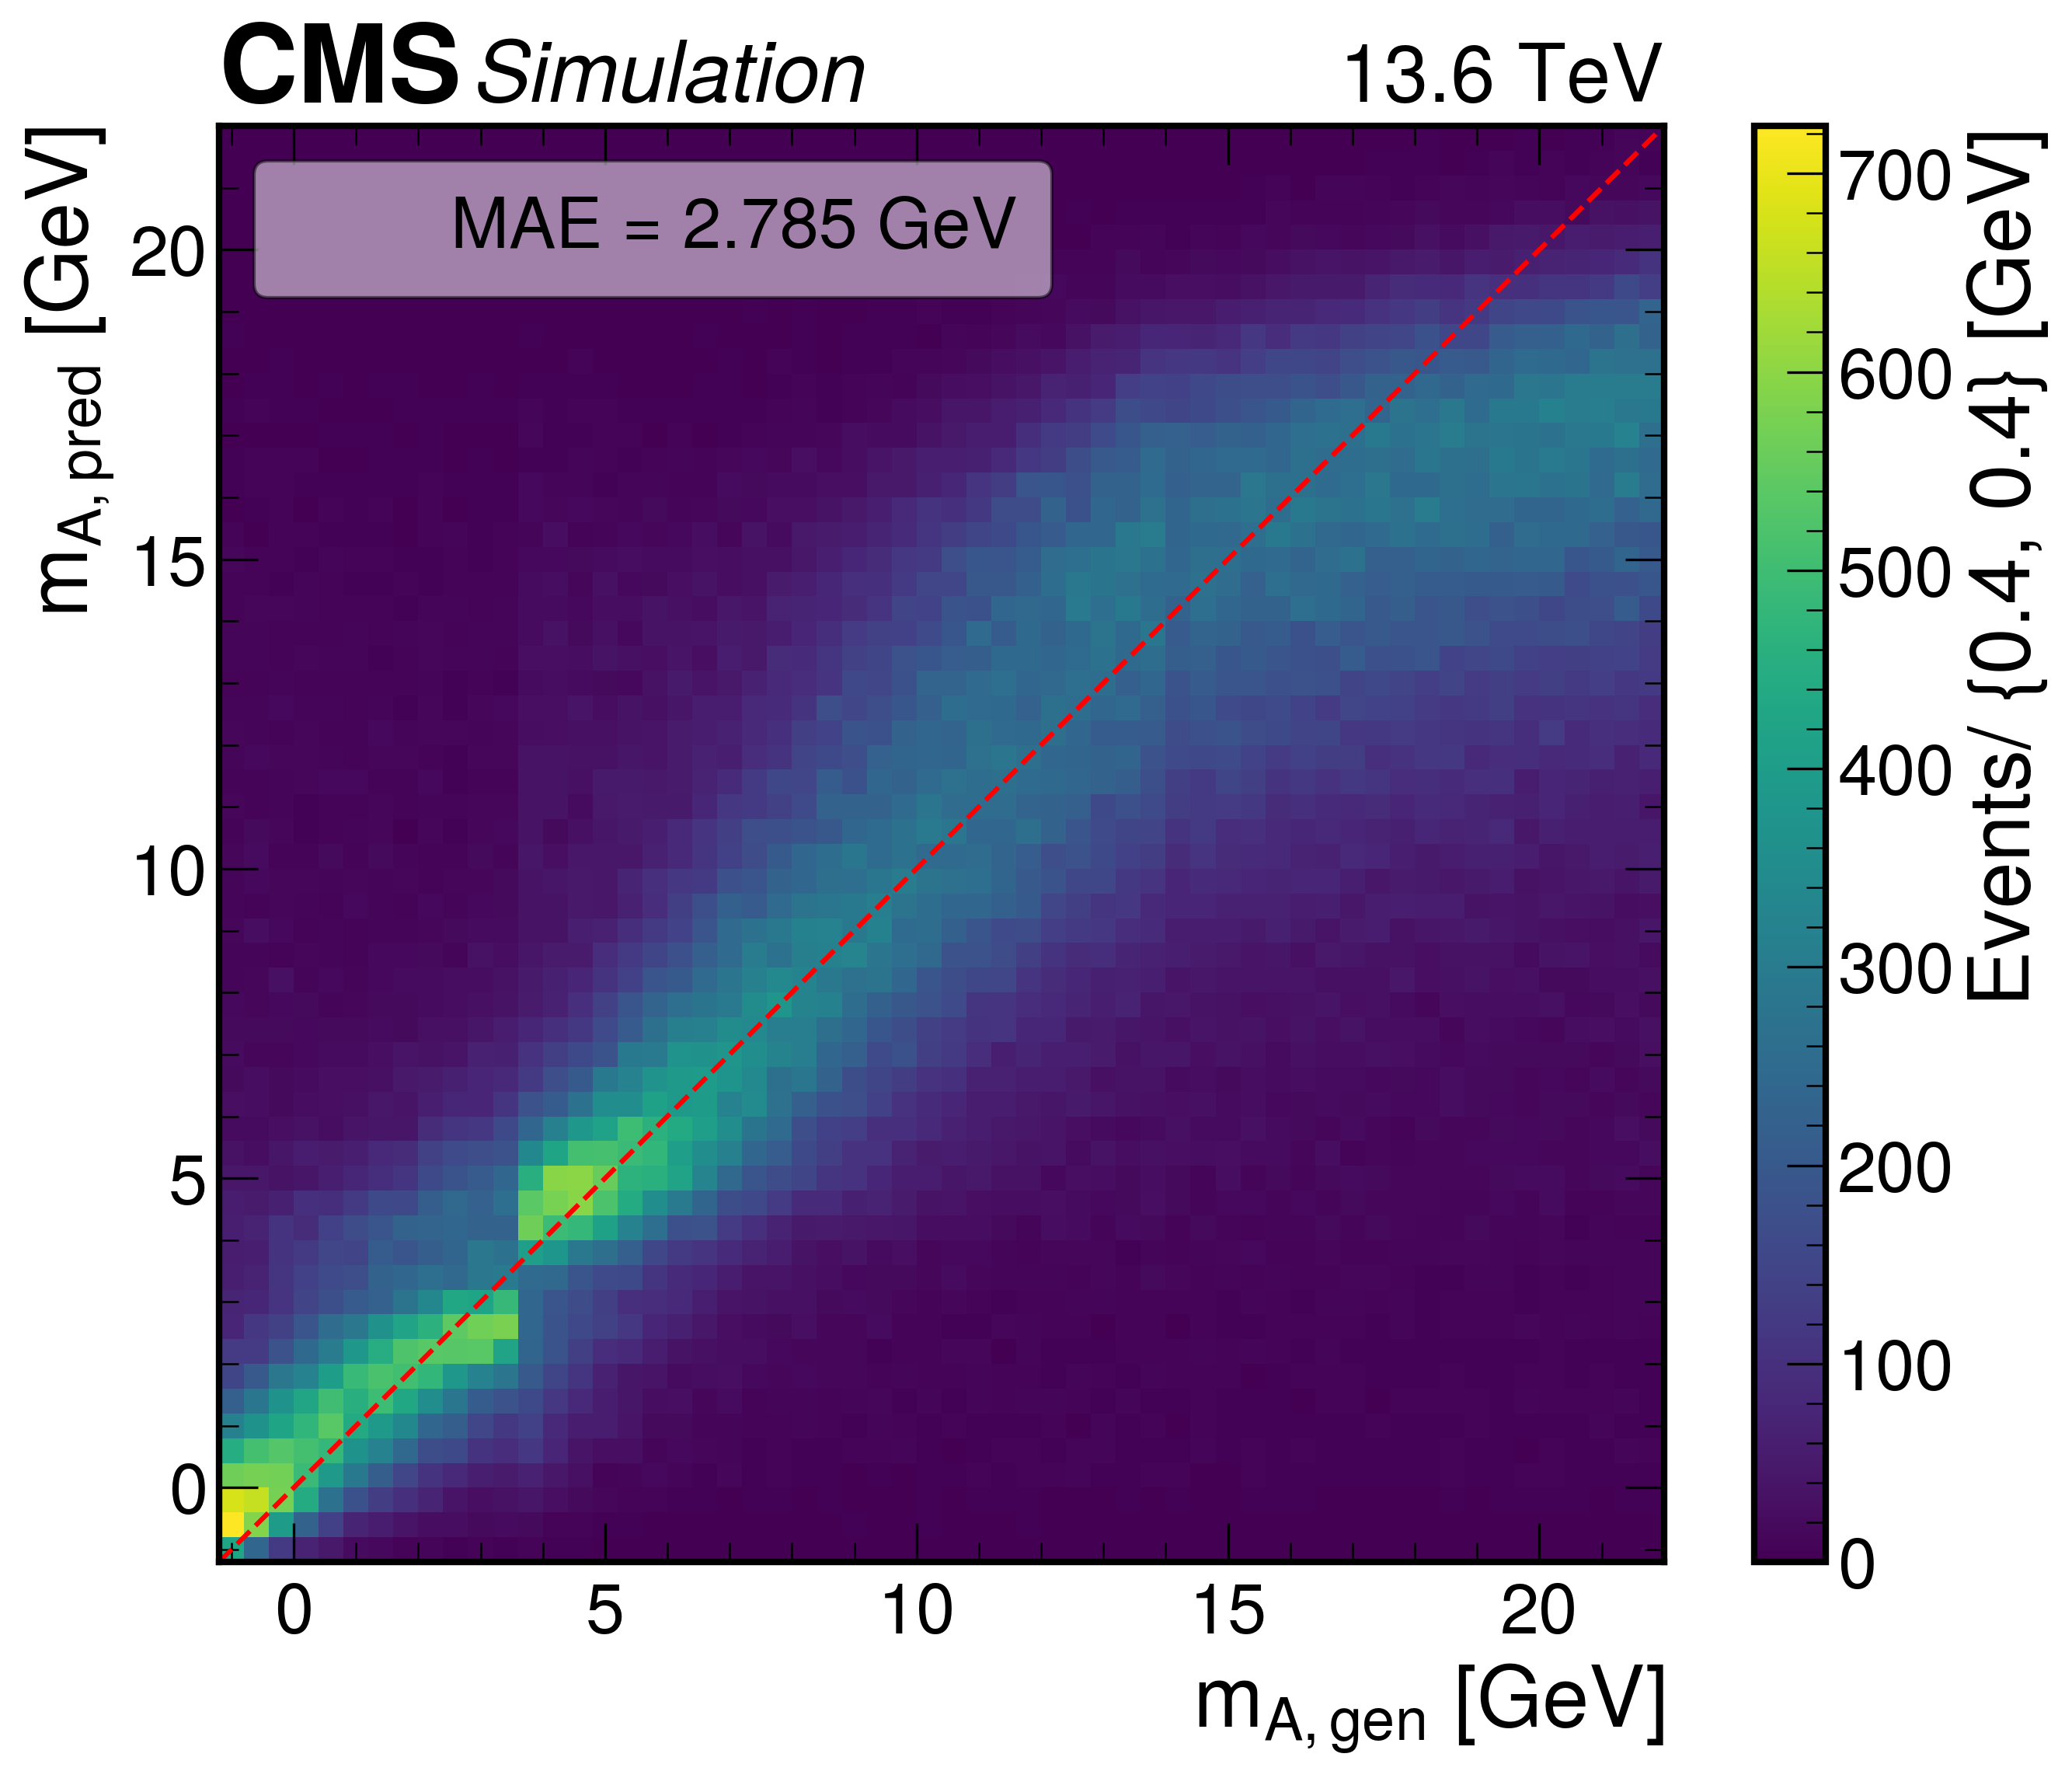

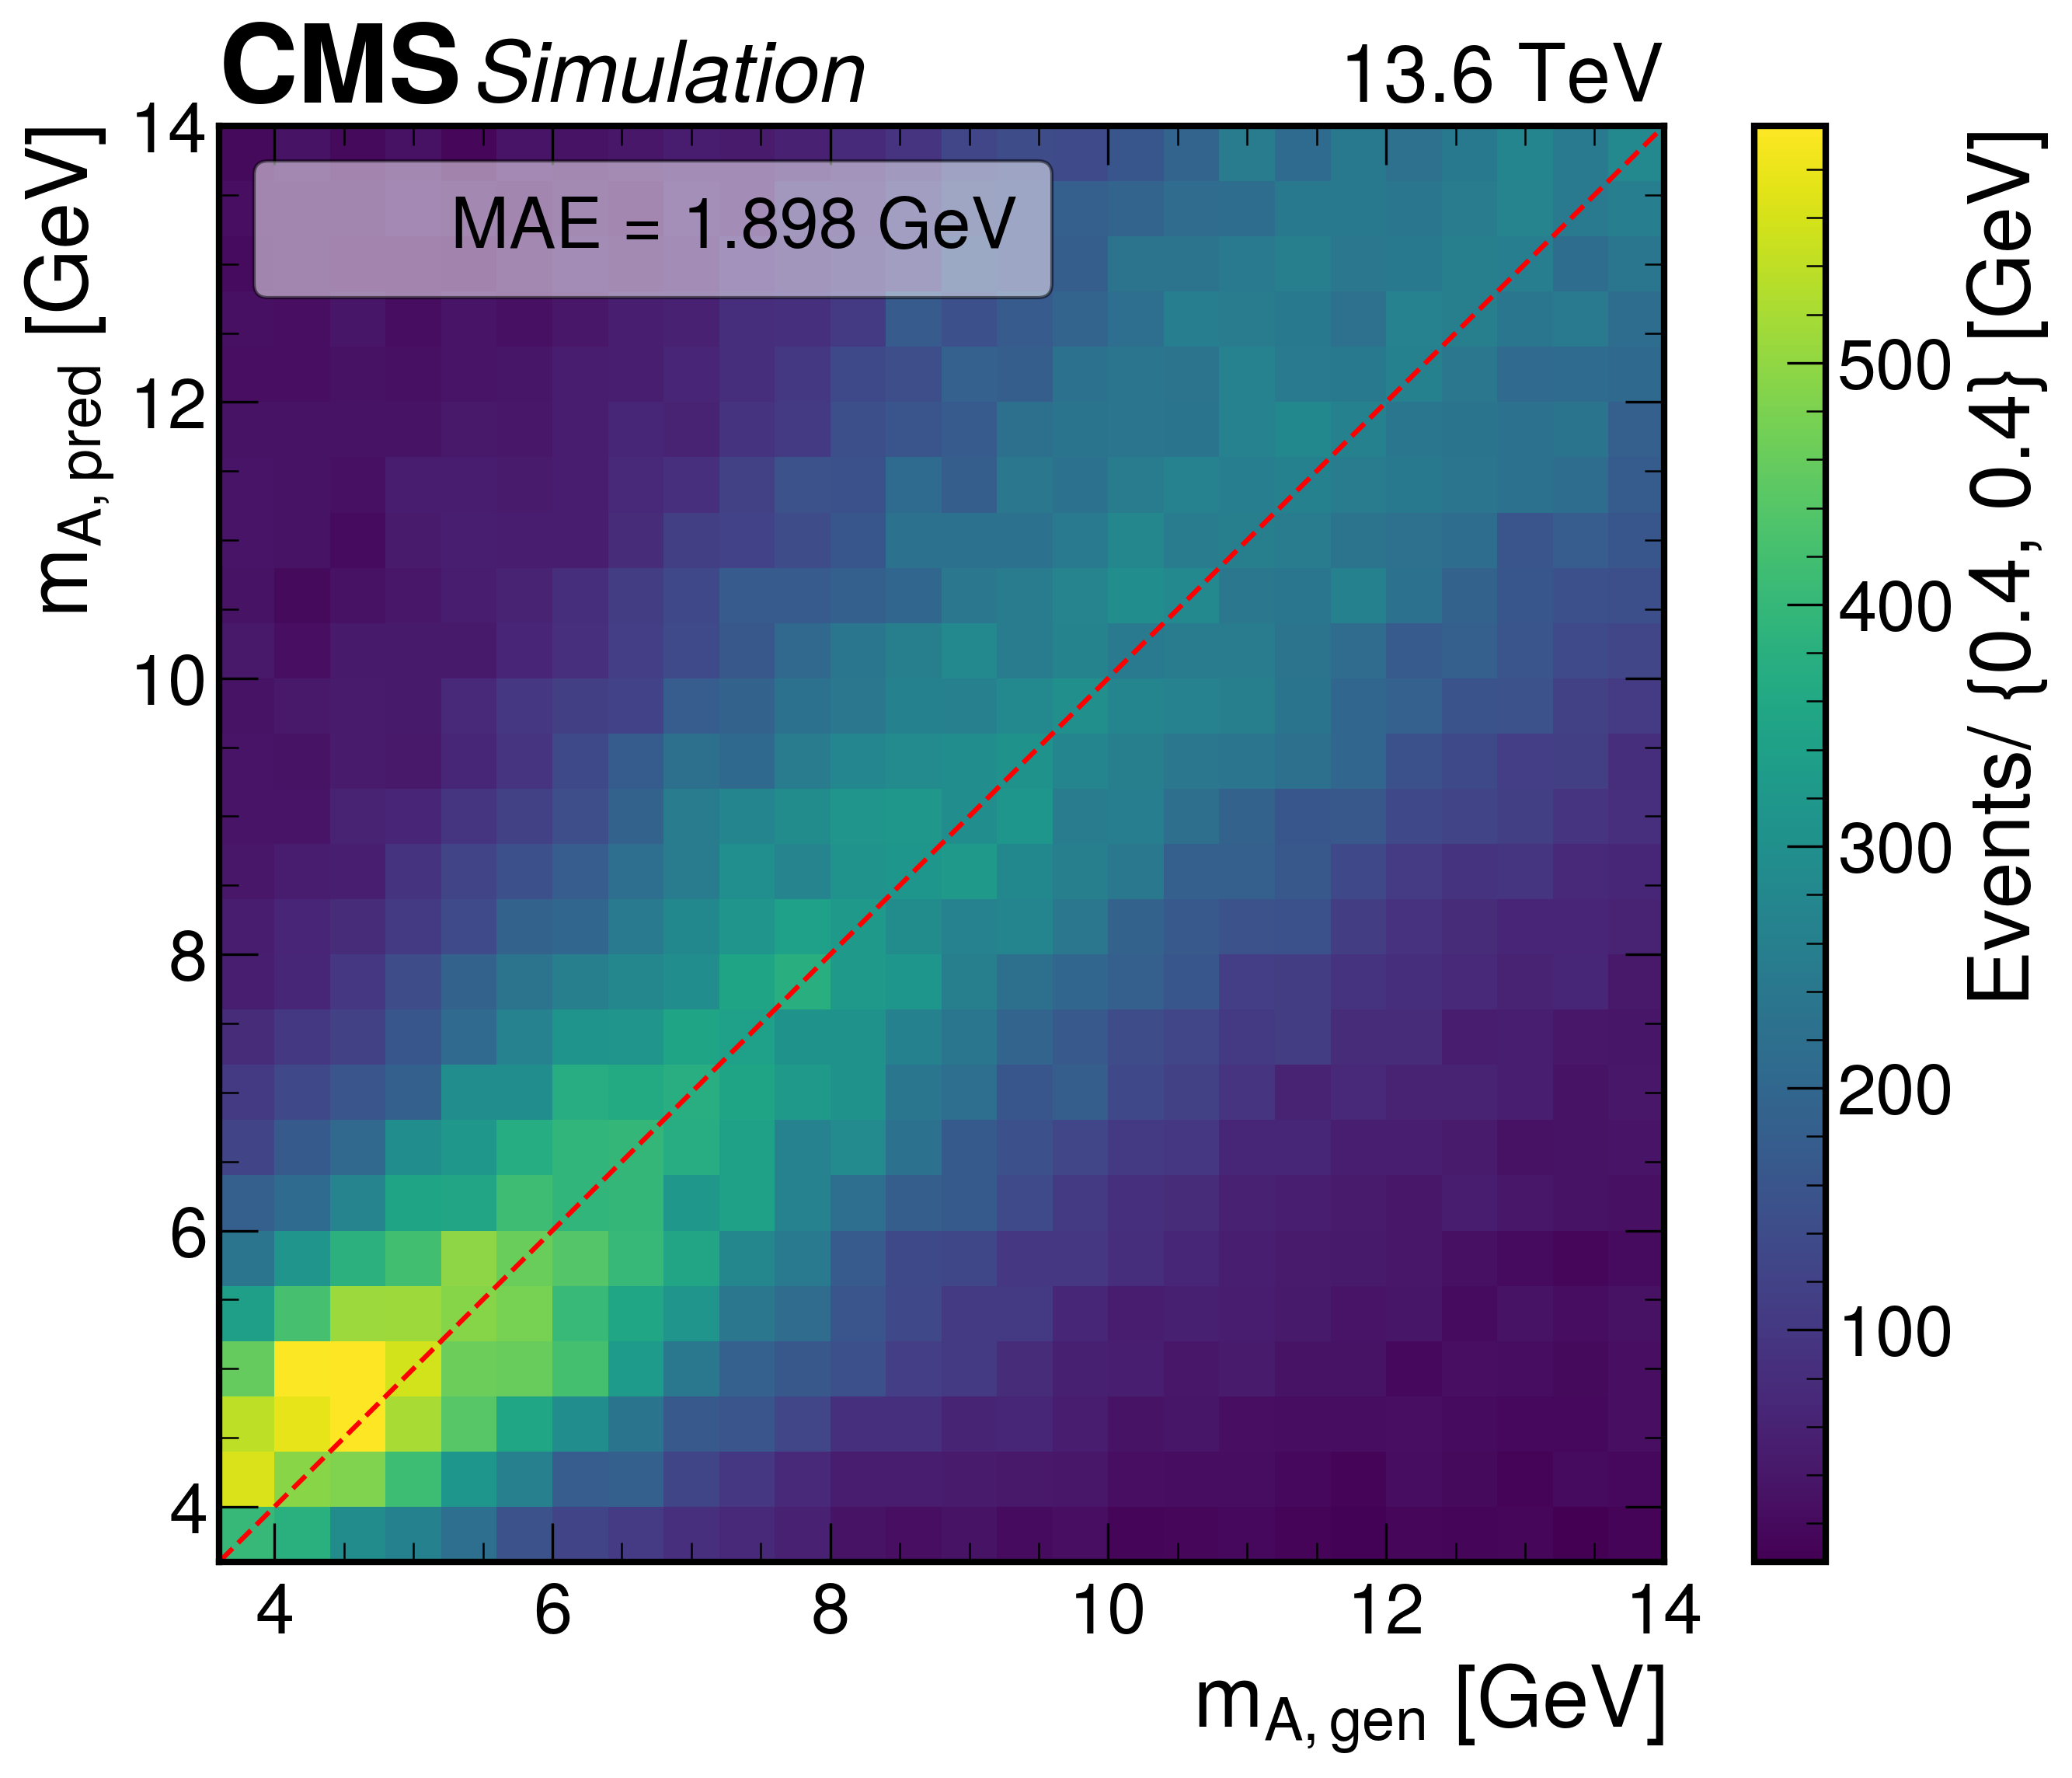

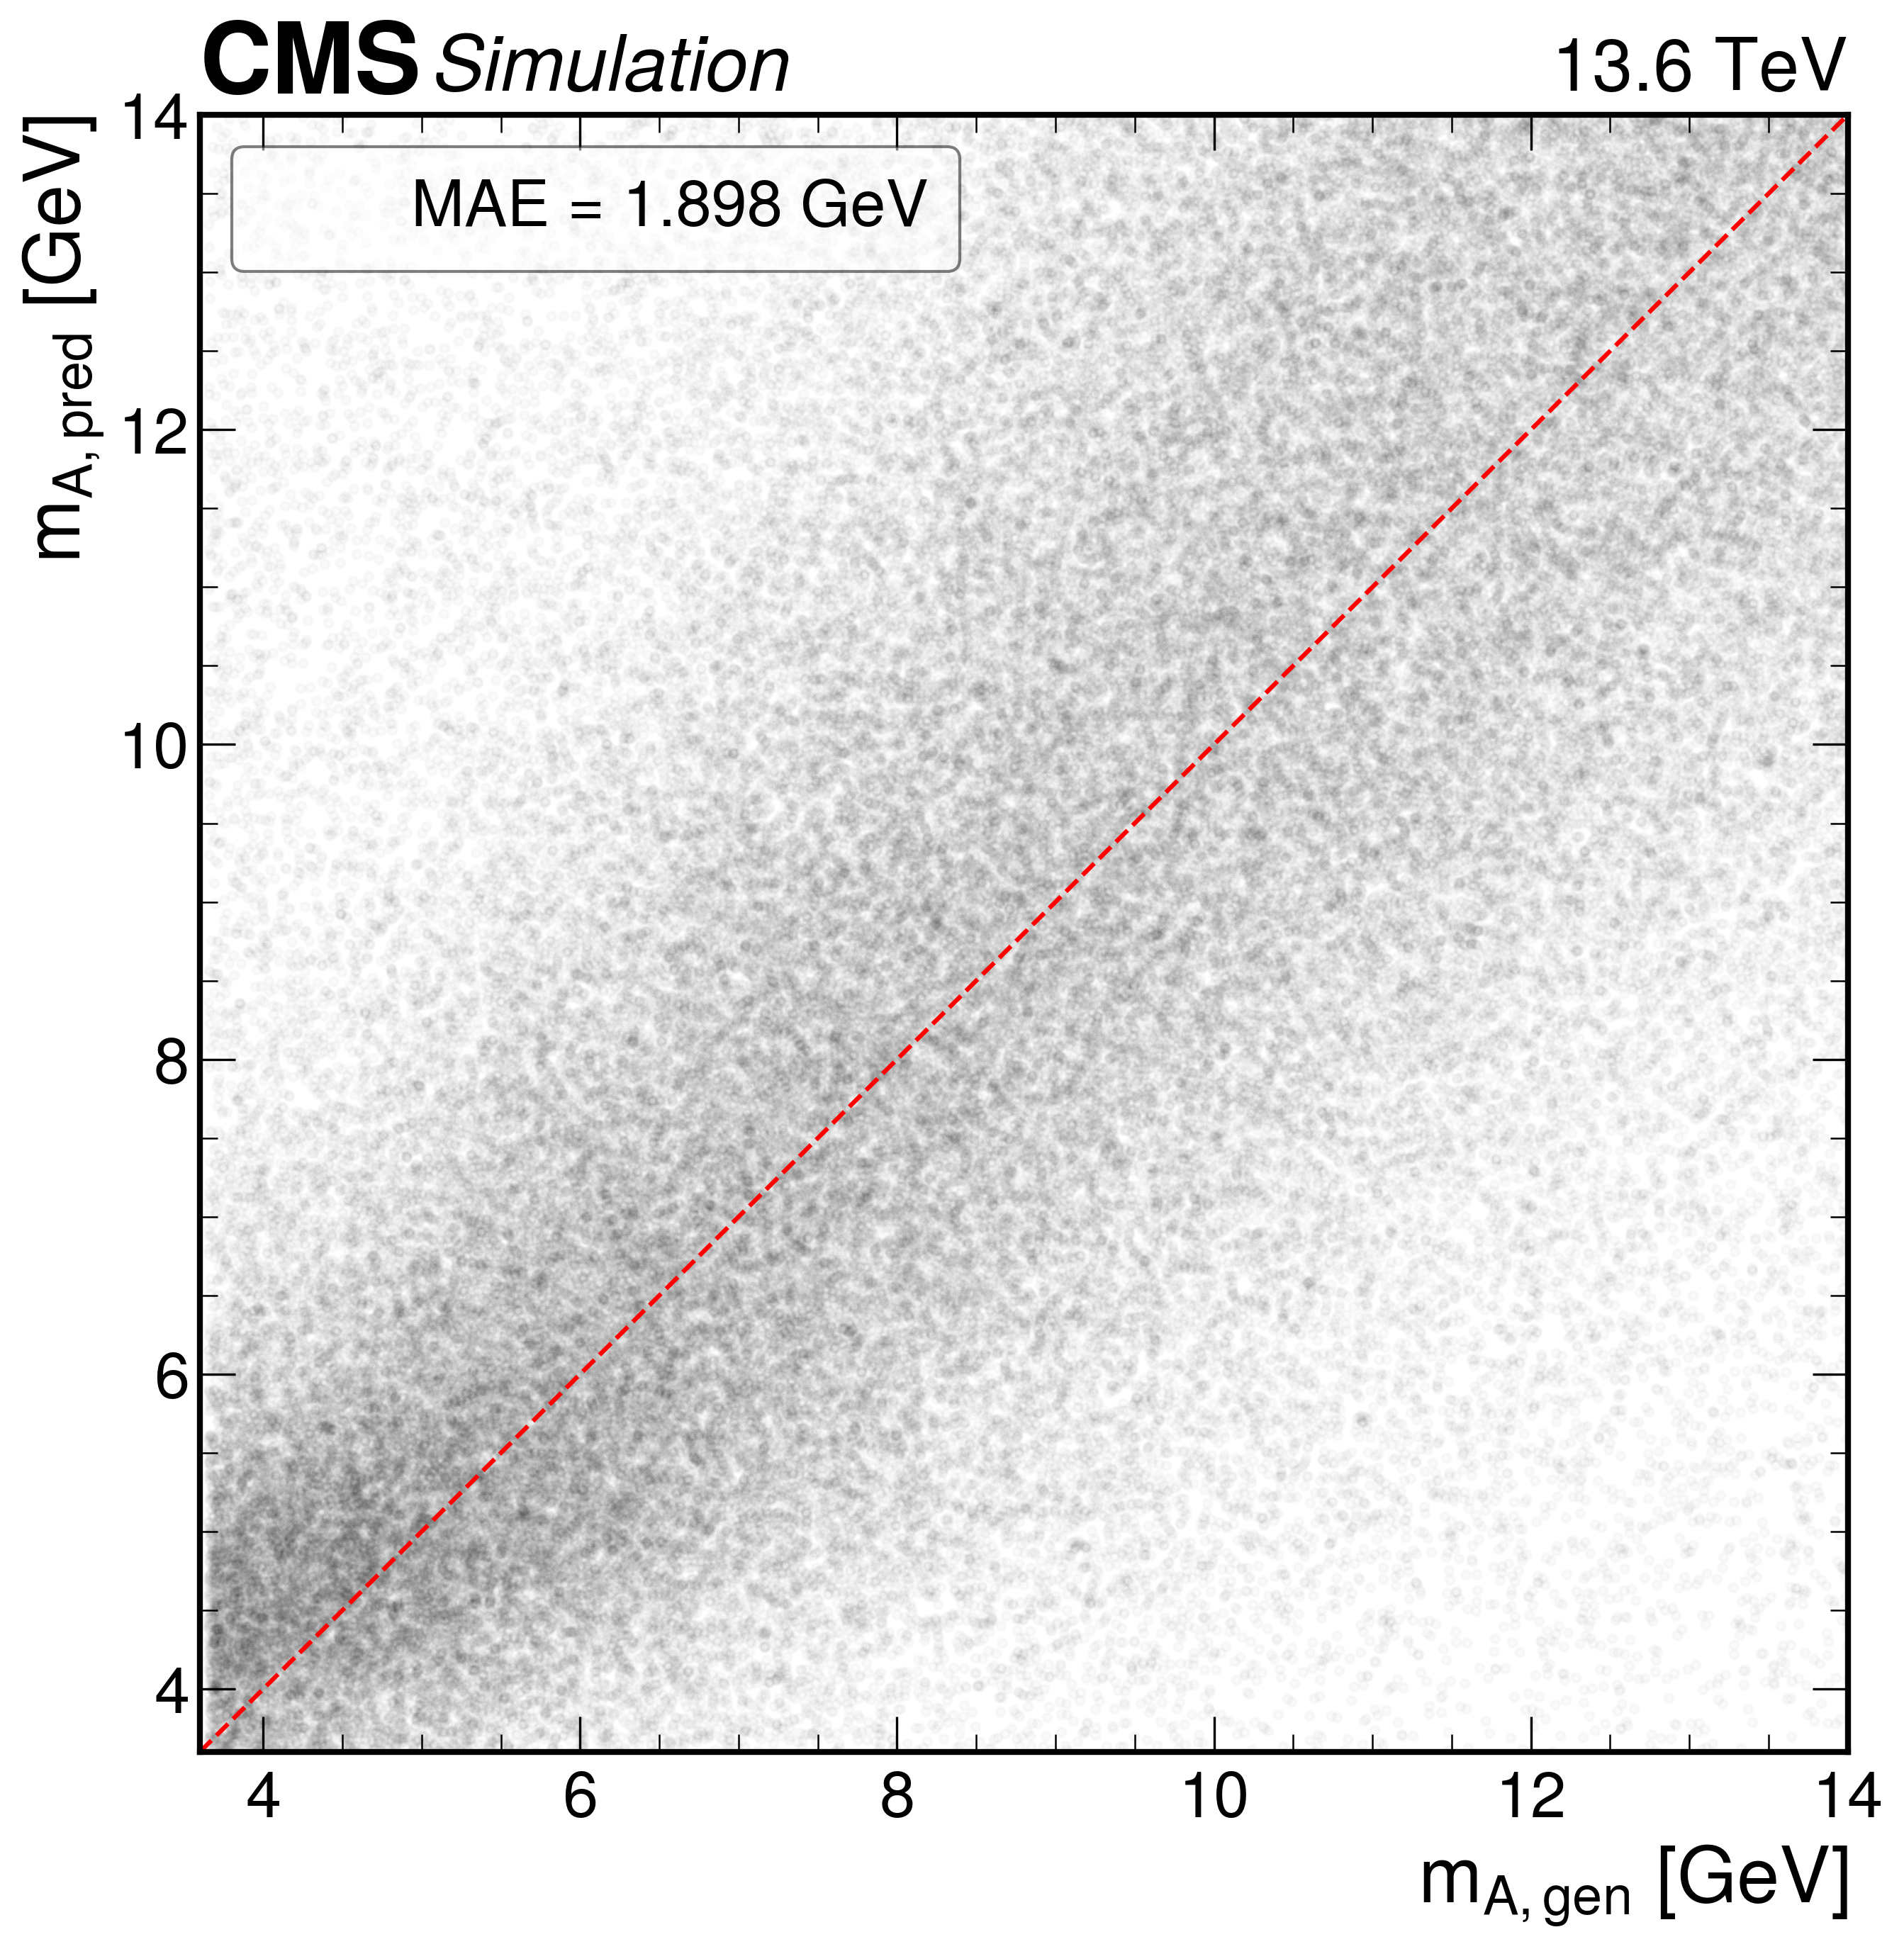

In [6]:
epoch=100
# for model_dir in model_dir_ua:
model_dir =  model_dir_ua[-1]
print(model_dir)
data_file = glob.glob(f"{data_dir}/{ua_dir}/{model_dir}/INFERENCE_DATA/epoch{epoch}_*.pkl")[0]

print(model_dir)
# print(f"loaded data file ------>  {data_file}")
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print("keys", data.keys())
# print(f"data.keys()------>  {data.keys()}")
infile.close()

m_true = data["m_true"]
m_pred = data["m_pred"]
# m0 = data["m0"]

mask1 = (m_true >= 3.6) & (m_true <=14)
m_true_ = m_true[mask1]
m_pred_ = m_pred[mask1]
# m0_ = m0[mask1]
mask2 = (m_pred_ >=3.6) & (m_pred_ <=14)
m_true__ = m_true_[mask2]
m_pred__ = m_pred_[mask2]
# m0__ = m0_[mask2]


m0_min = -1.2
m0_max = 22.1
bin_size =0.4

fig, ax = plt.subplots(dpi=300)
plt.plot([], [], ' ', label='MAE = %.3f GeV'%np.mean(np.abs(m_true - m_pred)))
plt.hist(m_true,  bins=np.arange(m0_min,m0_max+10,bin_size), histtype='step', label=r'$m_{A, gen}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred, bins=np.arange(m0_min,m0_max+10,bin_size), histtype='step', label=r'$m_{A, pred}$', linestyle='-', color='red', linewidth=2)
# plt.hist(m0, bins=np.arange(m0_min,m0_max+10,bin_size), histtype='step', label=r'$jet_{mass}$', linestyle='-', color='black')
plt.xlabel(r'$m_{A, gen}$ [GeV]')
plt.ylabel(r'Events/0.4 [GeV]')
plt.legend(loc='best')

hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.legend(loc='best', frameon=False, framealpha=0.5, facecolor='white', edgecolor='black')
# plt.savefig(f'{out_dir}/mtrue_mpred_mjet_{model_dir}_epoch_{epoch}_full_hist.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

    
    
fig, ax = plt.subplots(dpi=300)
plt.plot([], [], ' ', label='MAE = %.3f GeV'%np.mean(np.abs(m_true__ - m_pred__)))
plt.hist(m_true__,  bins=np.arange(3.2, 14.5,bin_size), histtype='step', label=r'$m_{A, gen}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred__, bins=np.arange(3.2, 14.5,bin_size), histtype='step', label=r'$m_{A, pred}$', linestyle='-', color='red', linewidth=2)
plt.xlabel(r'$m_{A, gen}$ [GeV]')
plt.ylabel(r'Events/0.4 [GeV]')
plt.legend(loc='best')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'{out_dir}/mtrue_mpred_{model_dir}_epoch_{epoch}_hist.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()
    

fig, ax = plt.subplots(figsize=(10,8),dpi=300)
plt.plot([], [], ' ', label='MAE = %.3f GeV'%np.mean(np.abs(m_true - m_pred)))
hist = plt.hist2d(np.squeeze(m_true), np.squeeze(m_pred), bins=[np.arange(m0_min, m0_max, .4), np.arange(m0_min, m0_max, .4)])
plt.xlabel(r'$m_{A, gen}$ [GeV]')
plt.ylabel(r'$m_{A, pred}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--')
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.legend(loc='upper left', frameon=True, framealpha=0.5, facecolor='white', edgecolor='black')
# plt.savefig(f'{out_dir}/mtrue_mpred_{model_dir}_epoch_{epoch}_full_2d_hist.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

fig, ax = plt.subplots(figsize=(10,8),dpi=300)
plt.plot([], [], ' ', label='MAE = %.3f GeV'%np.mean(np.abs(m_true__ - m_pred__)))
hist = plt.hist2d(np.squeeze(m_true__), np.squeeze(m_pred__), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)])
plt.xlabel(r'$m_{A, gen}$ [GeV]')
plt.ylabel(r'$m_{A, pred}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--')
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.legend(loc='upper left', frameon=True, framealpha=0.5, facecolor='white', edgecolor='black')
# plt.savefig(f'{out_dir}/mtrue_mpred_roi_{model_dir}_epoch_{epoch}_2d_hist.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


fig, ax = plt.subplots(dpi=300)
plt.plot(m_true__, m_pred__, ".", color='black', alpha=0.02, label='MAE = %.3f GeV'%np.mean(np.abs(m_true__ - m_pred__)))
plt.xlabel(r'$m_{A, gen}$ [GeV]')
plt.ylabel(r'$m_{A, pred}$ [GeV]')
m0_min, m0_max = 3.6, 14.0
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--')
hep.cms.label(llabel="Simulation", rlabel="13.6 TeV", loc=0, ax=ax)
plt.xlim(m0_min, m0_max)
plt.ylim(m0_min, m0_max)
plt.legend(loc='upper left', frameon=True, framealpha=0.5, facecolor='white', edgecolor='black')
# plt.savefig(f'{out_dir}/mtrue_mpred_roi_scatter_{model_dir}_epoch_{epoch}.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



In [41]:

# def plot_pred_signal_mass_jet_mass(Mass, data_file, model_dir):
#     infile = open(f"{data_file}", "rb")
#     data = pickle.load(infile)
#     print(model_dir)
#     infile.close()

#     m_true = {'3p7':3.7, '4':4, '6':6, '14':14}.get(Mass, None)
#     m_pred = data["m_pred"]
#     jet_mass = data["jet_mass"]
#     jet_pt = data["jet_pt"]

#     mask2 = (m_pred >=3.6) & (m_pred <=14)
#     m_pred_ = m_pred[mask2]
#     jet_mass_ = jet_mass[mask2]
#     jet_pt_ = jet_pt[mask2]

#     m0_min=-1.2
#     m0_max=25.1
#     bin_size =0.4
#     fig, ax = plt.subplots(dpi=300)
#     plt.axvline(m_true, label=r"$m_{true}$" + f"={m_true} GeV")
#     plt.hist(m_pred, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$m_{pred}$  '+'(MAE = %.3f GeV)'%np.mean(np.abs(m_true - m_pred)), linestyle='-', color='red', linewidth=2)
#     plt.hist(jet_mass, bins=np.arange(m0_min,m0_max,bin_size), histtype='step', label=r'$jet_{mass}$', linestyle='-', color='black')
#     plt.xlabel(r'$m_{A, gen}$ [GeV]')
#     plt.ylabel('Events/ 0.4 [GeV]')
#     plt.legend(loc='upper right', fontsize=12)
#     hep.cms.label(llabel="Simulation", rlabel=f"$m_A$={m_true} GeV          "    +   "13.6 TeV", loc=0, ax=ax)
#     # plt.savefig(f'{out_dir}/signal_mass_{Mass}_inference_{model_dir}_epoch_{epoch}.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
#     plt.show()

In [9]:

def plot_pred_signal_mass_jet_mass(Mass, data_file, model_dir):
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    print(model_dir)
    infile.close()

    m_true = {'3p7':3.7, '4':4, '6':6, '14':14}.get(Mass, None)
    m_pred = data["m_pred"]
    jet_mass = data["jet_mass"]
    jet_pt = data["jet_pt"]

    mask2 = (m_pred >=3.6) & (m_pred <=14)
    m_pred_ = m_pred[mask2]
    jet_mass_ = jet_mass[mask2]
    jet_pt_ = jet_pt[mask2]

    m0_min=-1.2
    m0_max=25.1
    bin_size =0.4
    fig, ax = plt.subplots(dpi=300)
    plt.axvline(m_true, label=r"$m_{true}$" + f"={m_true} GeV")
    h1=np.histogram(m_pred, bins=np.arange(m0_min,m0_max,bin_size))
    hep.histplot(h1, histtype='step', yerr=True, label=r'$m_{pred}$  '+'(MAE = %.3f GeV)'%np.mean(np.abs(m_true - m_pred)), color='red')
    h2=np.histogram(jet_mass, bins=np.arange(m0_min,m0_max,bin_size))
    hep.histplot(h2, histtype='step', yerr=True, label=r'$jet_{mass}$', linestyle='-', color='black')
    plt.xlabel(r'$m_{A, gen}$ [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    plt.legend(loc='upper right', fontsize=12)
    hep.cms.label(llabel="Simulation", rlabel=f"$m_A$={m_true} GeV          "    +   "13.6 TeV", loc=0, ax=ax)
    # plt.savefig(f'{out_dir}/signal_mass_{Mass}_inference_{model_dir}_epoch_{epoch}.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

13_ResNet_map_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2


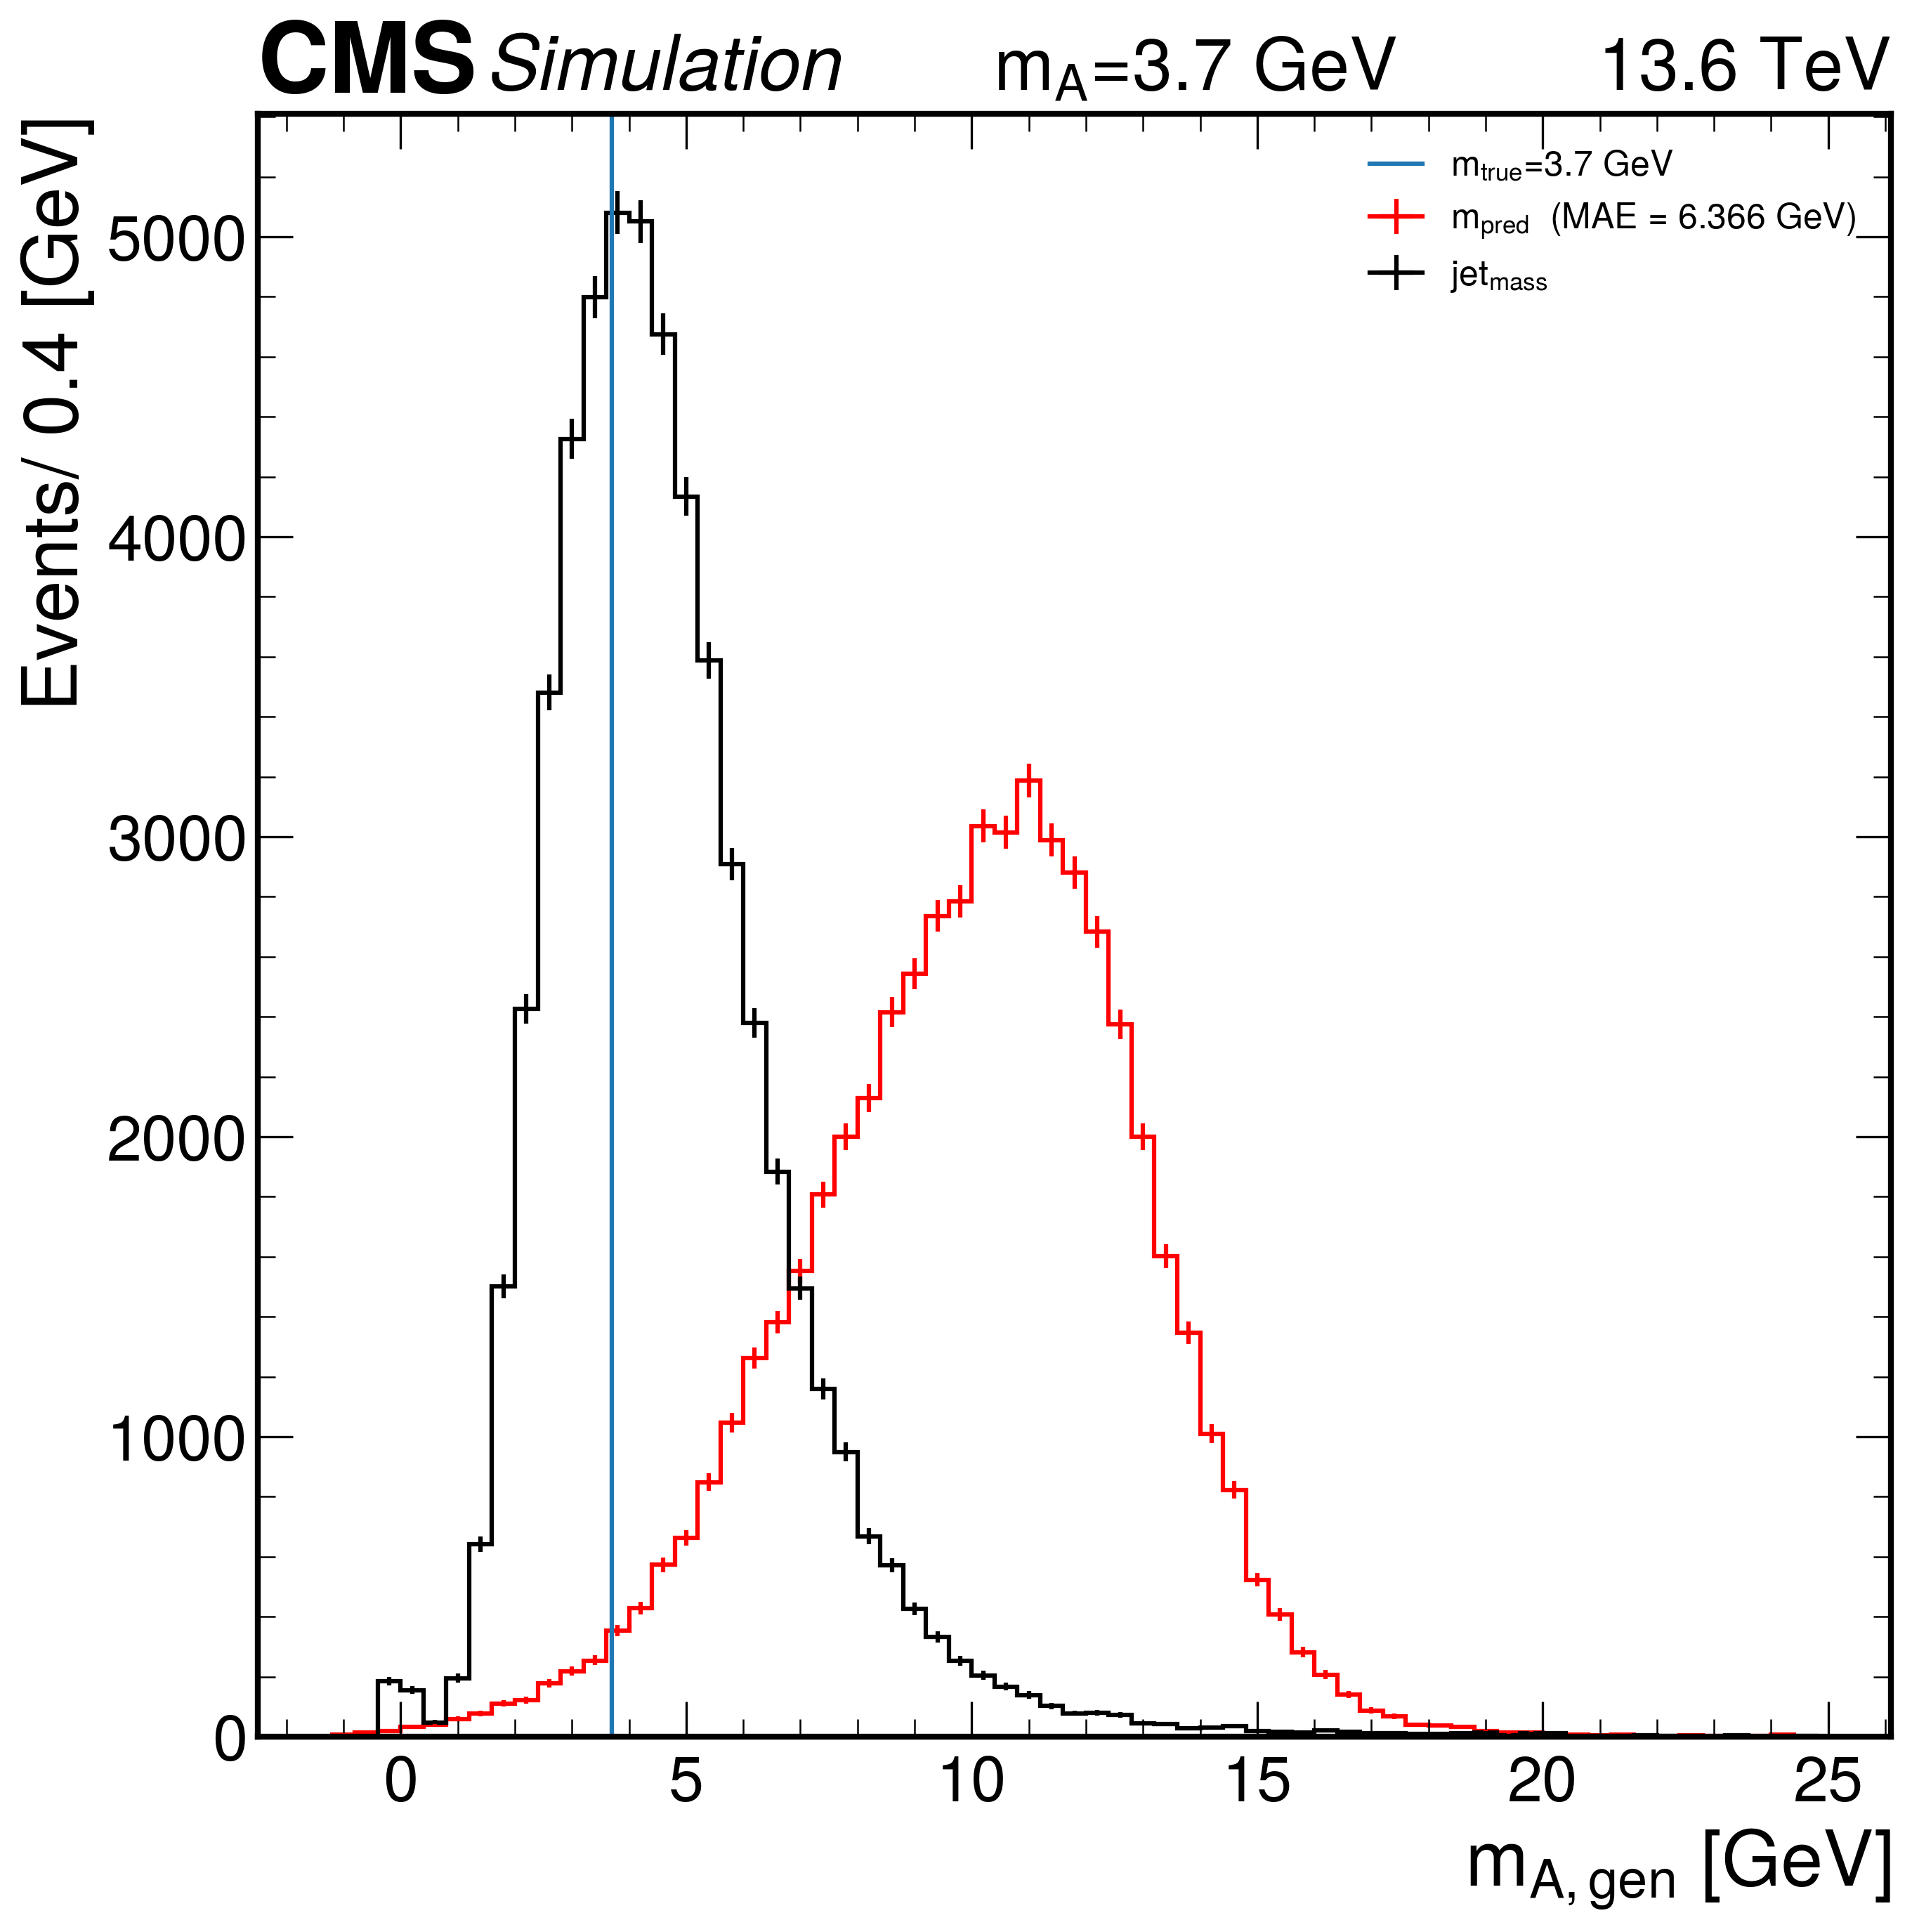

In [15]:
data_dir ='../analysis_run3/Data_for_plots/mass_regression_test_data/jupyter_notebook_new'

ua_dir = 'ResNet_min_max_scaling_mN1p2To22_chanel_test_m0_22_unbiased_map'
model_dir_ua = ['13_ResNet_map_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2']




epoch=100
Mass = ['3p7', '14']
Mass=Mass[0]
for model_dir in model_dir_ua:
    data_file = glob.glob(f"{data_dir}/{ua_dir}/{model_dir}/signal_{Mass}_epoch_{epoch}_inference_data.pkl")[0]
    plot_pred_signal_mass_jet_mass(Mass, data_file, model_dir)

### Plot e2e prediction for different jet pt ranges

In [15]:

def plot_e2e_prediction_pf_jet_mass(mass=3.7, plot="m_pred", in_file="../analysis_run3/Data_for_plots/mass_regression_test_data/upper_lower_streching_epoch_36_signal_mass_3p7_inference_data.pkl", model="model"):
    infile = open(f"{in_file}", "rb")
    data = pickle.load(infile)
    print(f"loaded data file ------>  {data_file}")
    infile.close()
    m0_min, m0_max, bin_size = -1.2, 22.2, 0.4
    m_true = mass
    m_pred = data[f"{plot}"]
    jet_mass = data["jet_mass"]
    jet_pt = data["jet_pt"]

    mask1 = (jet_pt >=20) & (jet_pt <55)
    mask2 = (jet_pt >=55) & (jet_pt <70)
    mask3 = (jet_pt >=70) & (jet_pt <100)
    mask4 = jet_pt >=100

    m_pred1= m_pred[mask1]
    m_pred2= m_pred[mask2] 
    m_pred3= m_pred[mask3]
    m_pred4= m_pred[mask4]



    fig, ax = plt.subplots(dpi=300)
    if plot=='m_pred': 
        plt.plot([], [], ' ', label='From E2E')
        name_tag='E2E'
    else: 
         plt.plot([], [], ' ', label='From PF Jet mass')
         name_tag='Jet_mass'
    plt.axvline(m_true, linestyle='--', label=r"$m_{true}$" + f"={m_true} GeV", color='grey', alpha=0.5)

    # Define bin edges and centers
    bins = np.arange(m0_min, m0_max, bin_size)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])




    # Helper to plot histogram and error bars
    def plot_with_errors(data, label, color, error_bar):
        counts, _ = np.histogram(data, bins=bins)
        norm = np.sum(counts)
        counts_norm = counts / norm
        errors = np.sqrt(counts) / norm
        # plt.hist(data, bins=bins, histtype='step', label=label, color=color, density=True, linewidth=2)
        plt.errorbar(bin_centers, counts_norm, yerr=errors, fmt=error_bar, color=color, markersize=6, linewidth=1, label=label)

    # Plot each pt region
    plot_with_errors(m_pred1, r'low $p_{T,jet}$ '+' (MAE = %.3f GeV)'%np.mean(np.abs(m_true - m_pred1)), 'red', 'o')
    plot_with_errors(m_pred2, r'mid $p_{T,jet}$ '+' (MAE = %.3f GeV)'%np.mean(np.abs(m_true - m_pred2)), 'black', 's')
    plot_with_errors(m_pred3, r'high $p_{T,jet}$ '+' (MAE = %.3f GeV)'%np.mean(np.abs(m_true - m_pred3)), 'blue', 'v')
    plot_with_errors(m_pred4, r'ultra $p_{T,jet}$ '+' (MAE = %.3f GeV)'%np.mean(np.abs(m_true - m_pred4)), 'green', 'd')
    plt.xlabel('$m_A$ [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best', fontsize=14)
    hep.cms.label(llabel="Simulation  ", rlabel=f"$m_A$={m_true} GeV           "   +   "13.6 TeV", loc=0, ax=ax)
    plt.tight_layout()
    mass_str = str(mass).replace('.', 'p')
    # plt.savefig(f'{out_dir}/signal_mass_{mass_str}_prediction_from_{name_tag}_{model}.pdf',facecolor='w',dpi=300)
    plt.show()


In [18]:
epoch=100
Masses = ['3p7', '14']
for Mass in Masses:
    m_true = {'3p7':3.7, '4':4, '6':6, '14':14}.get(Mass, None)
    model_dir = model_dir_ua[0]
    data_file = glob.glob(f"{data_dir}/{ua_dir}/{model_dir}/signal_{Mass}_epoch_{epoch}_inference_data.pkl")[0]
    print(model_dir)
    # plot_e2e_prediction_pf_jet_mass(mass=m_true, plot="m_pred", in_file=data_file, model=model_dir)
    
    

13_ResNet_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2
13_ResNet_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2


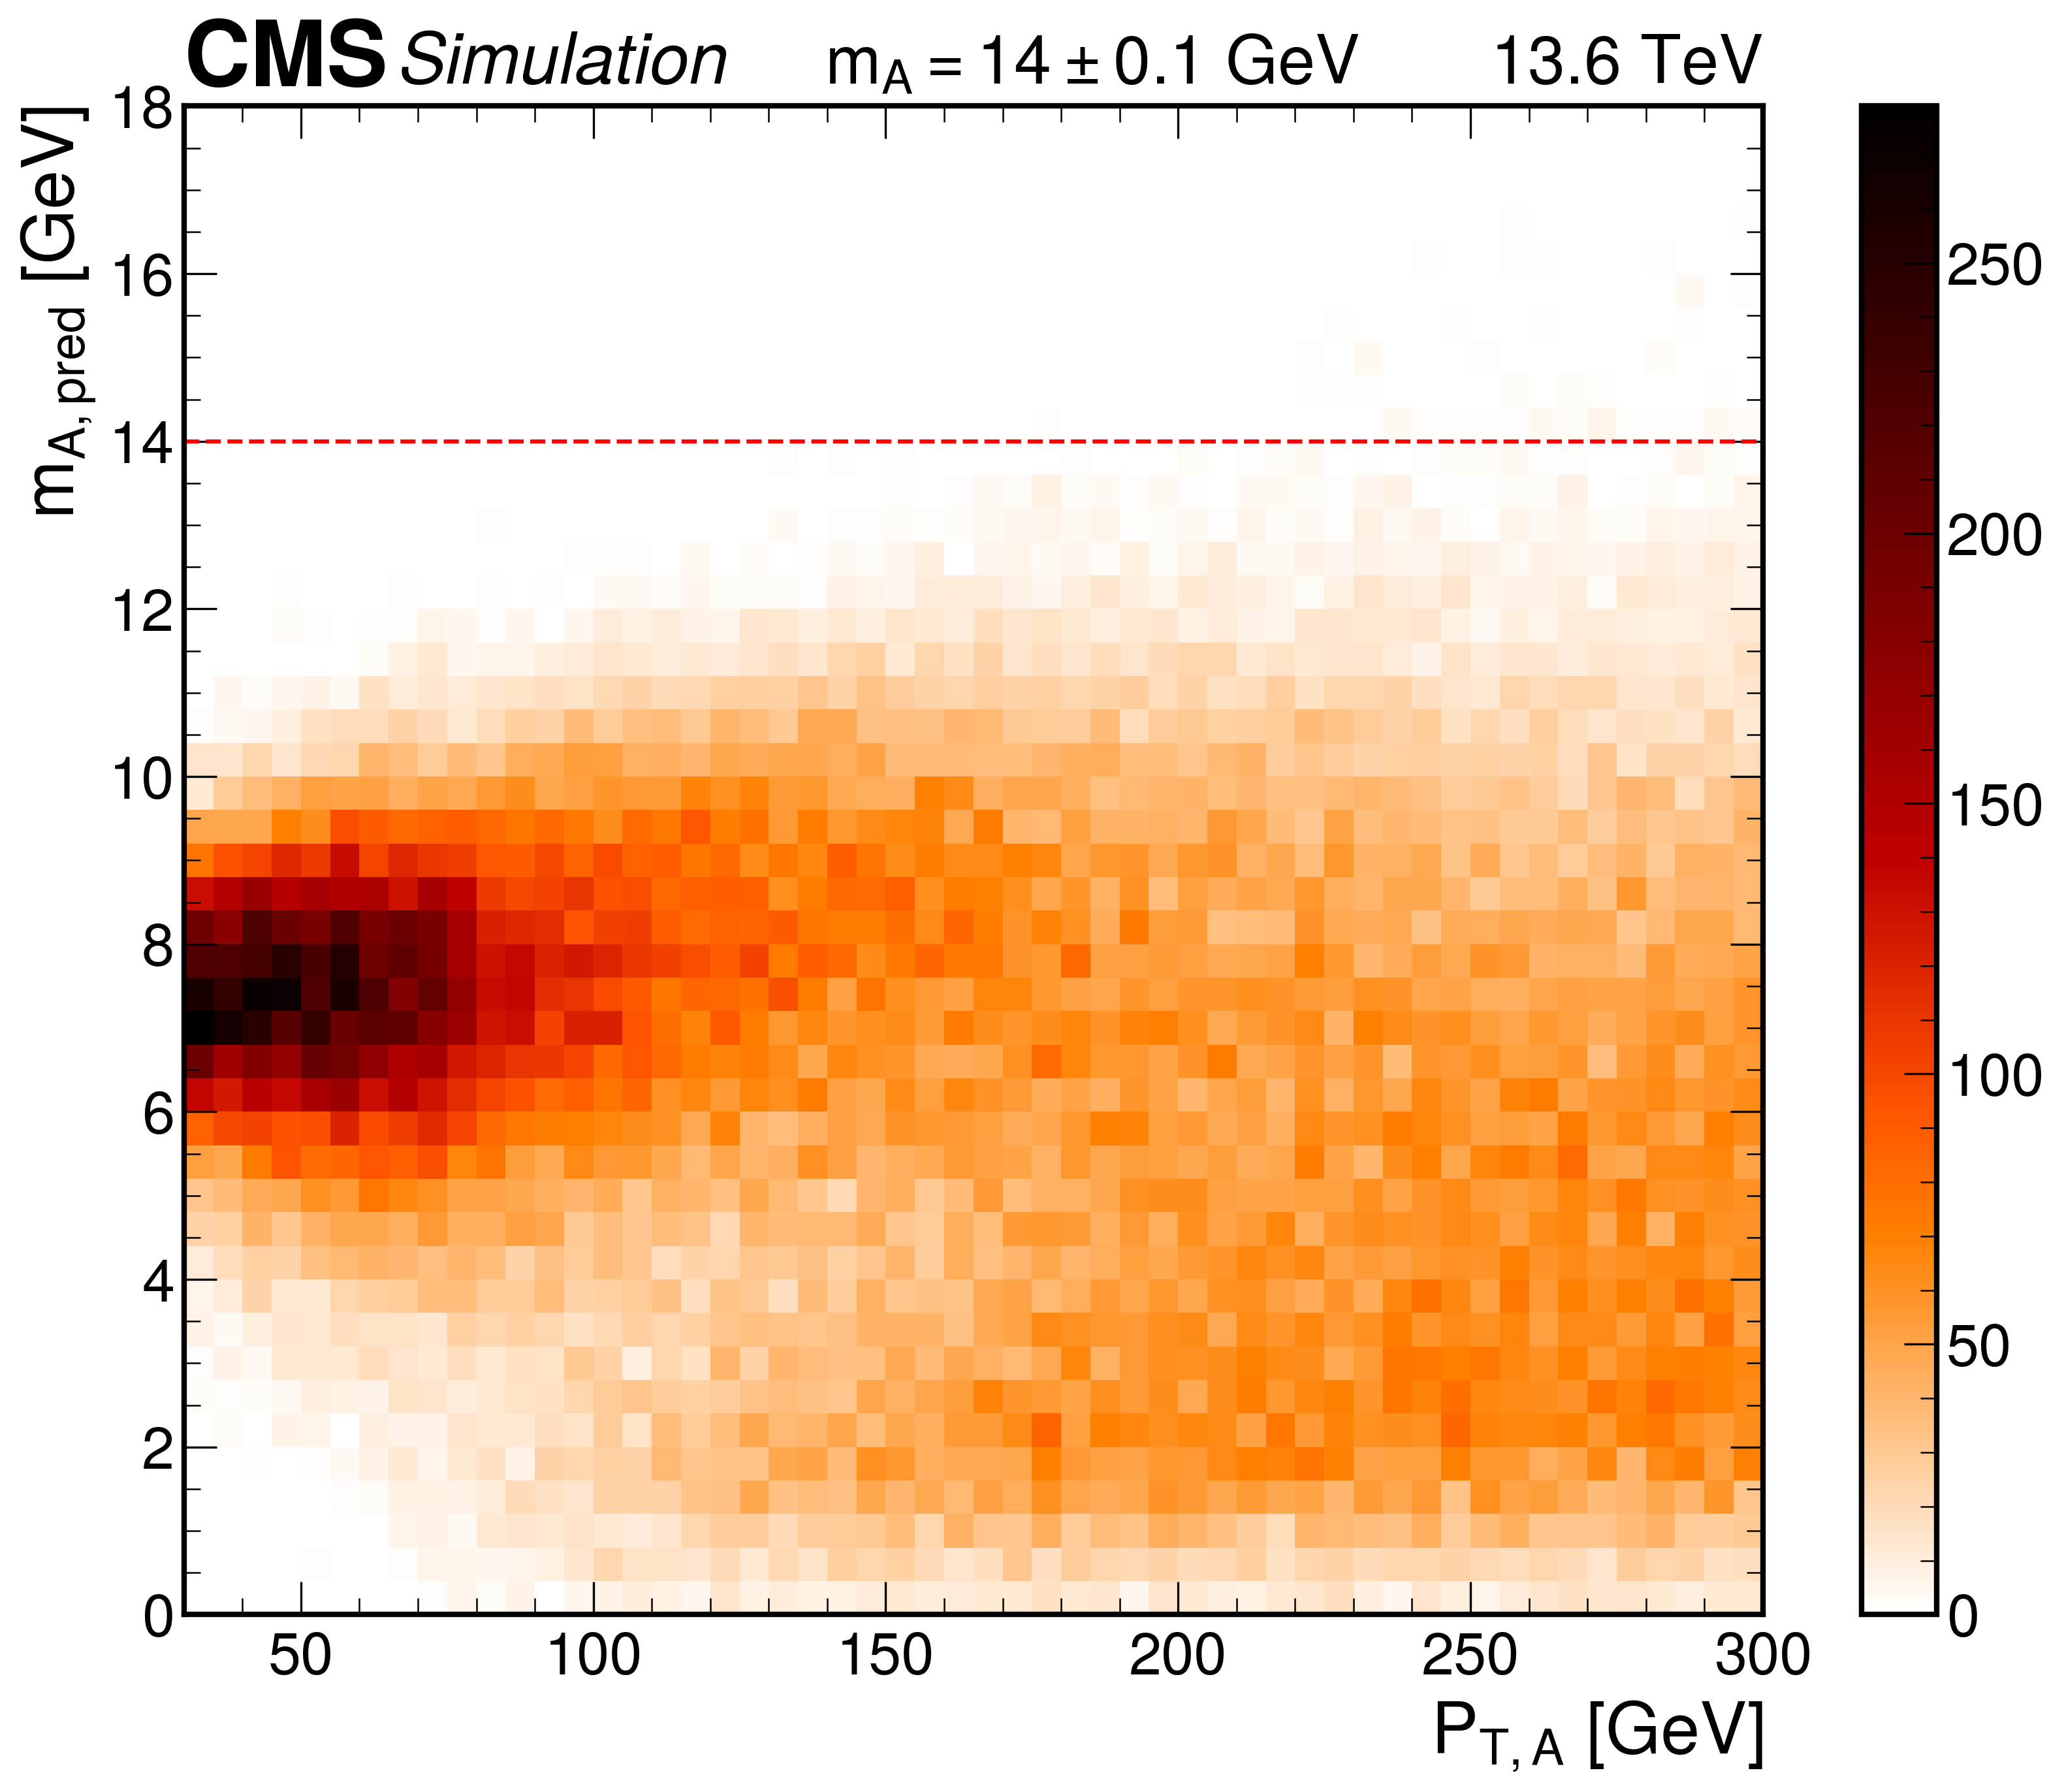

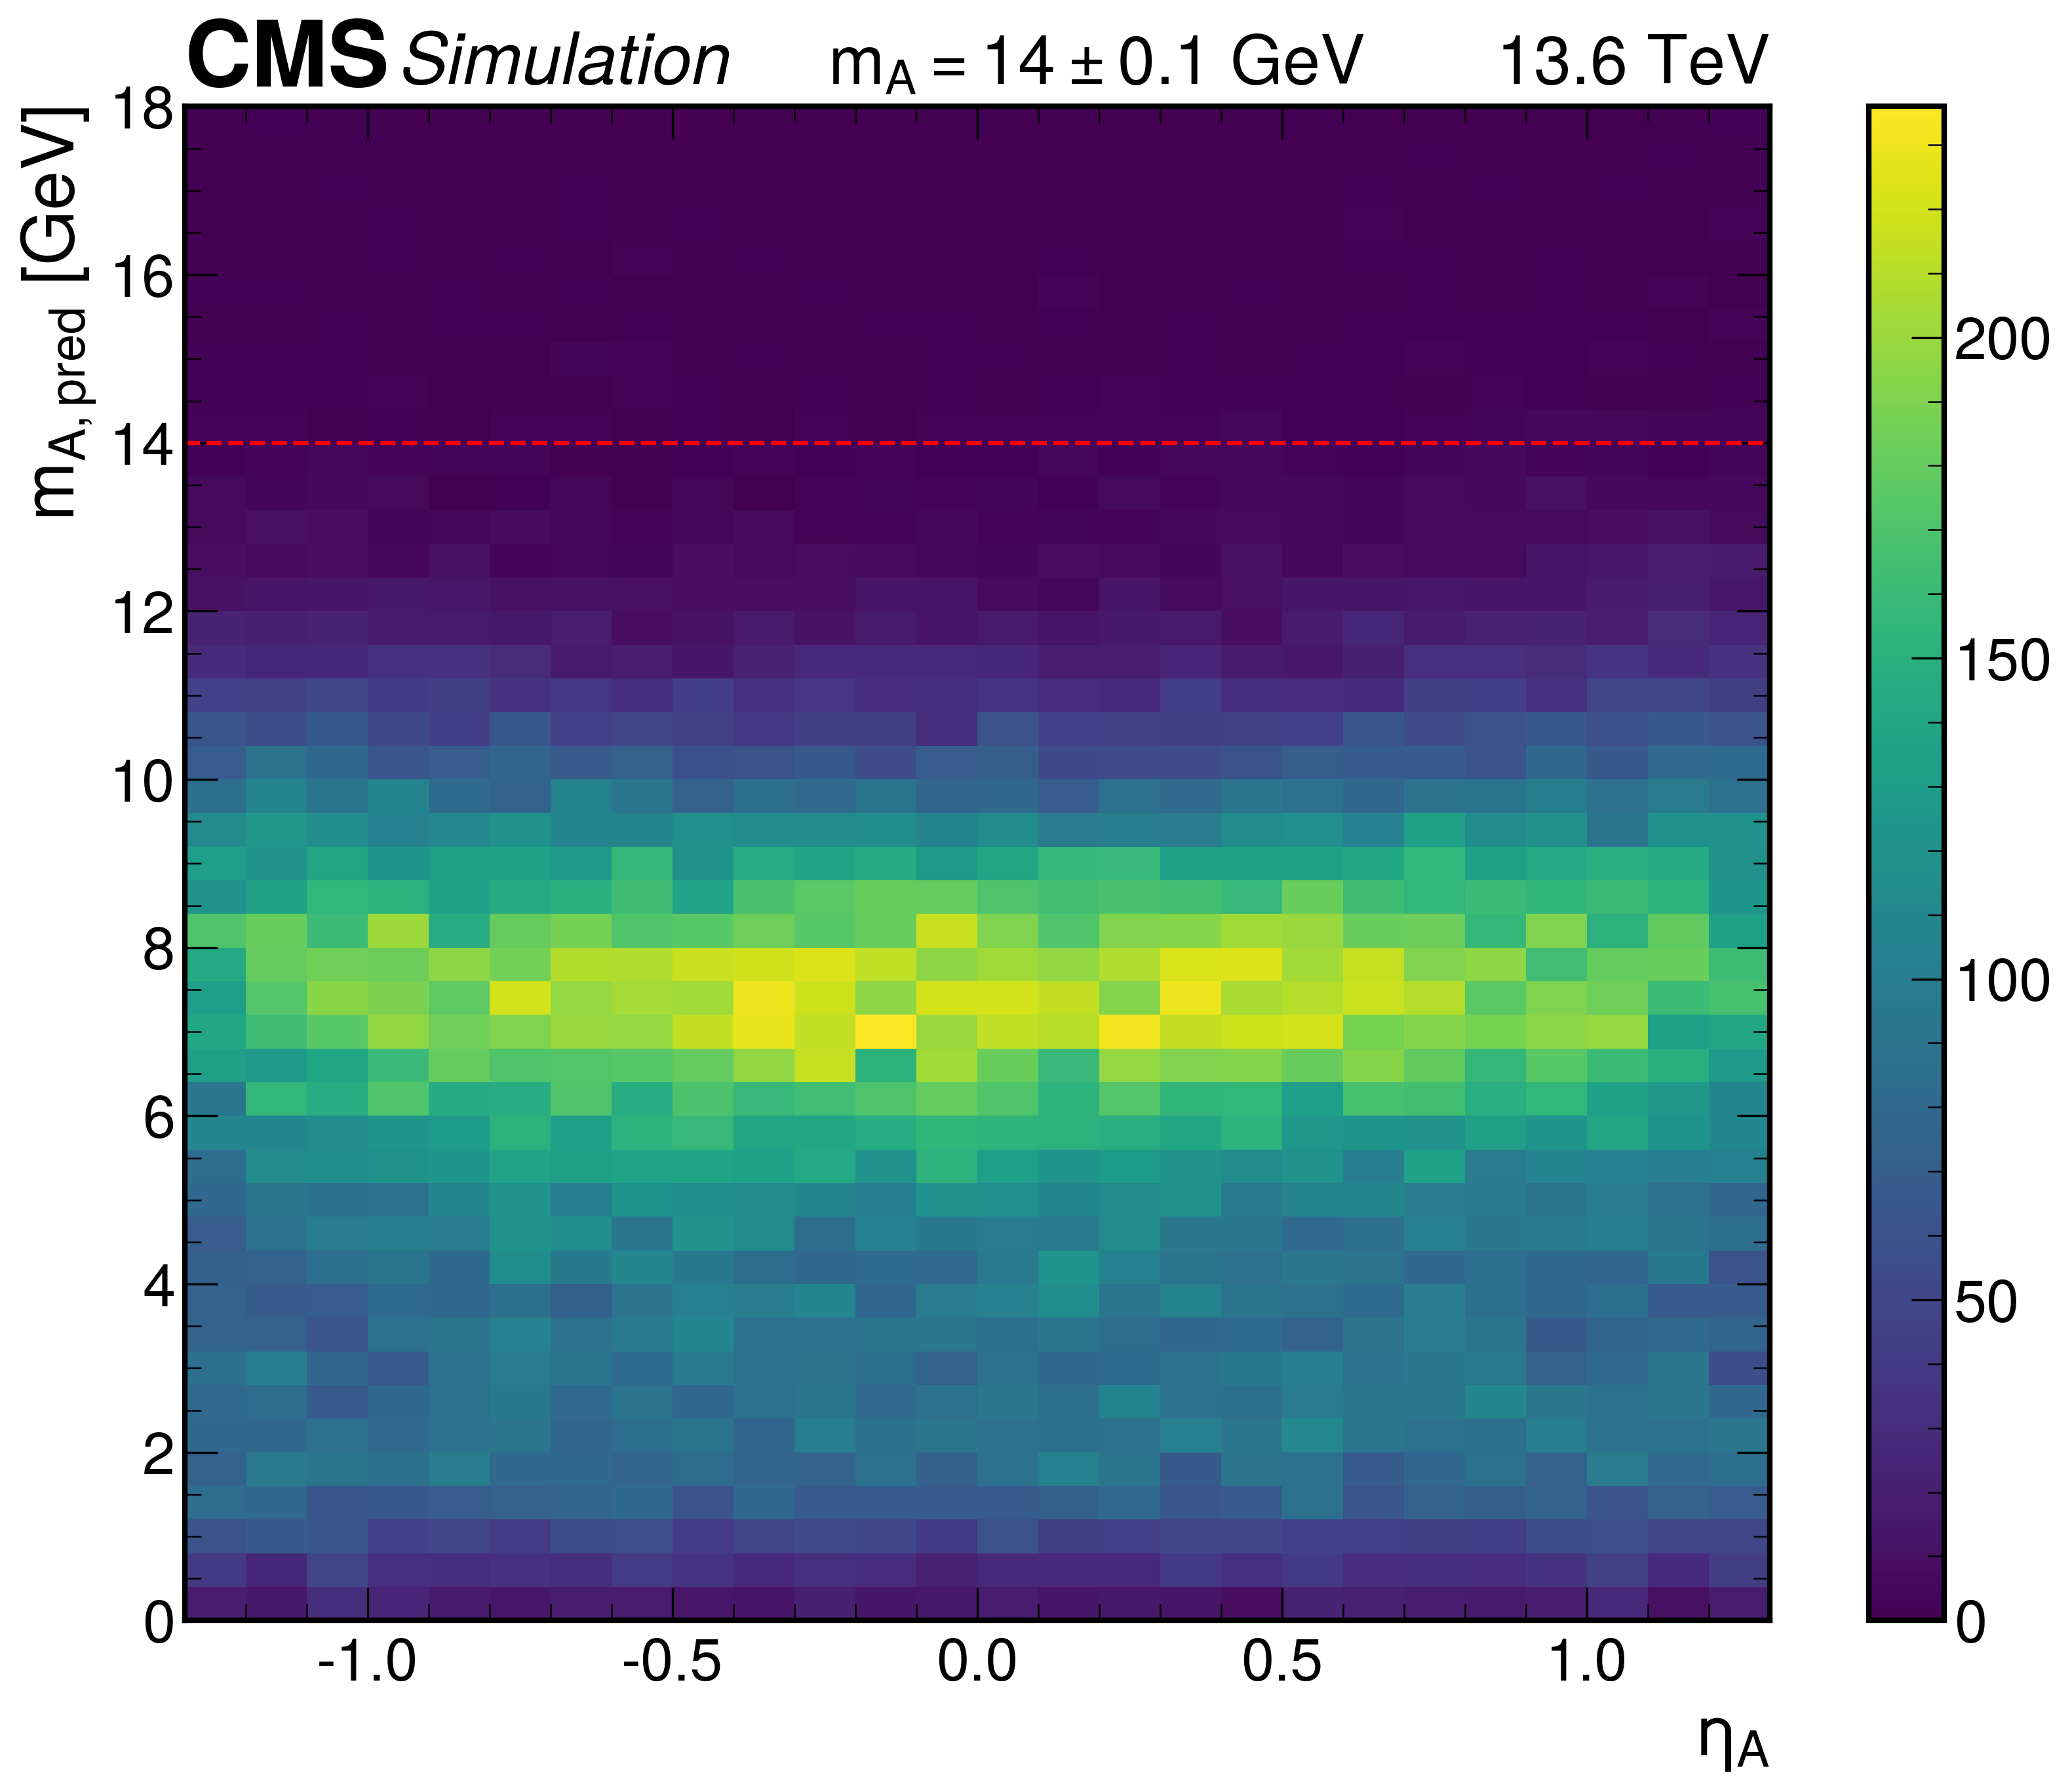

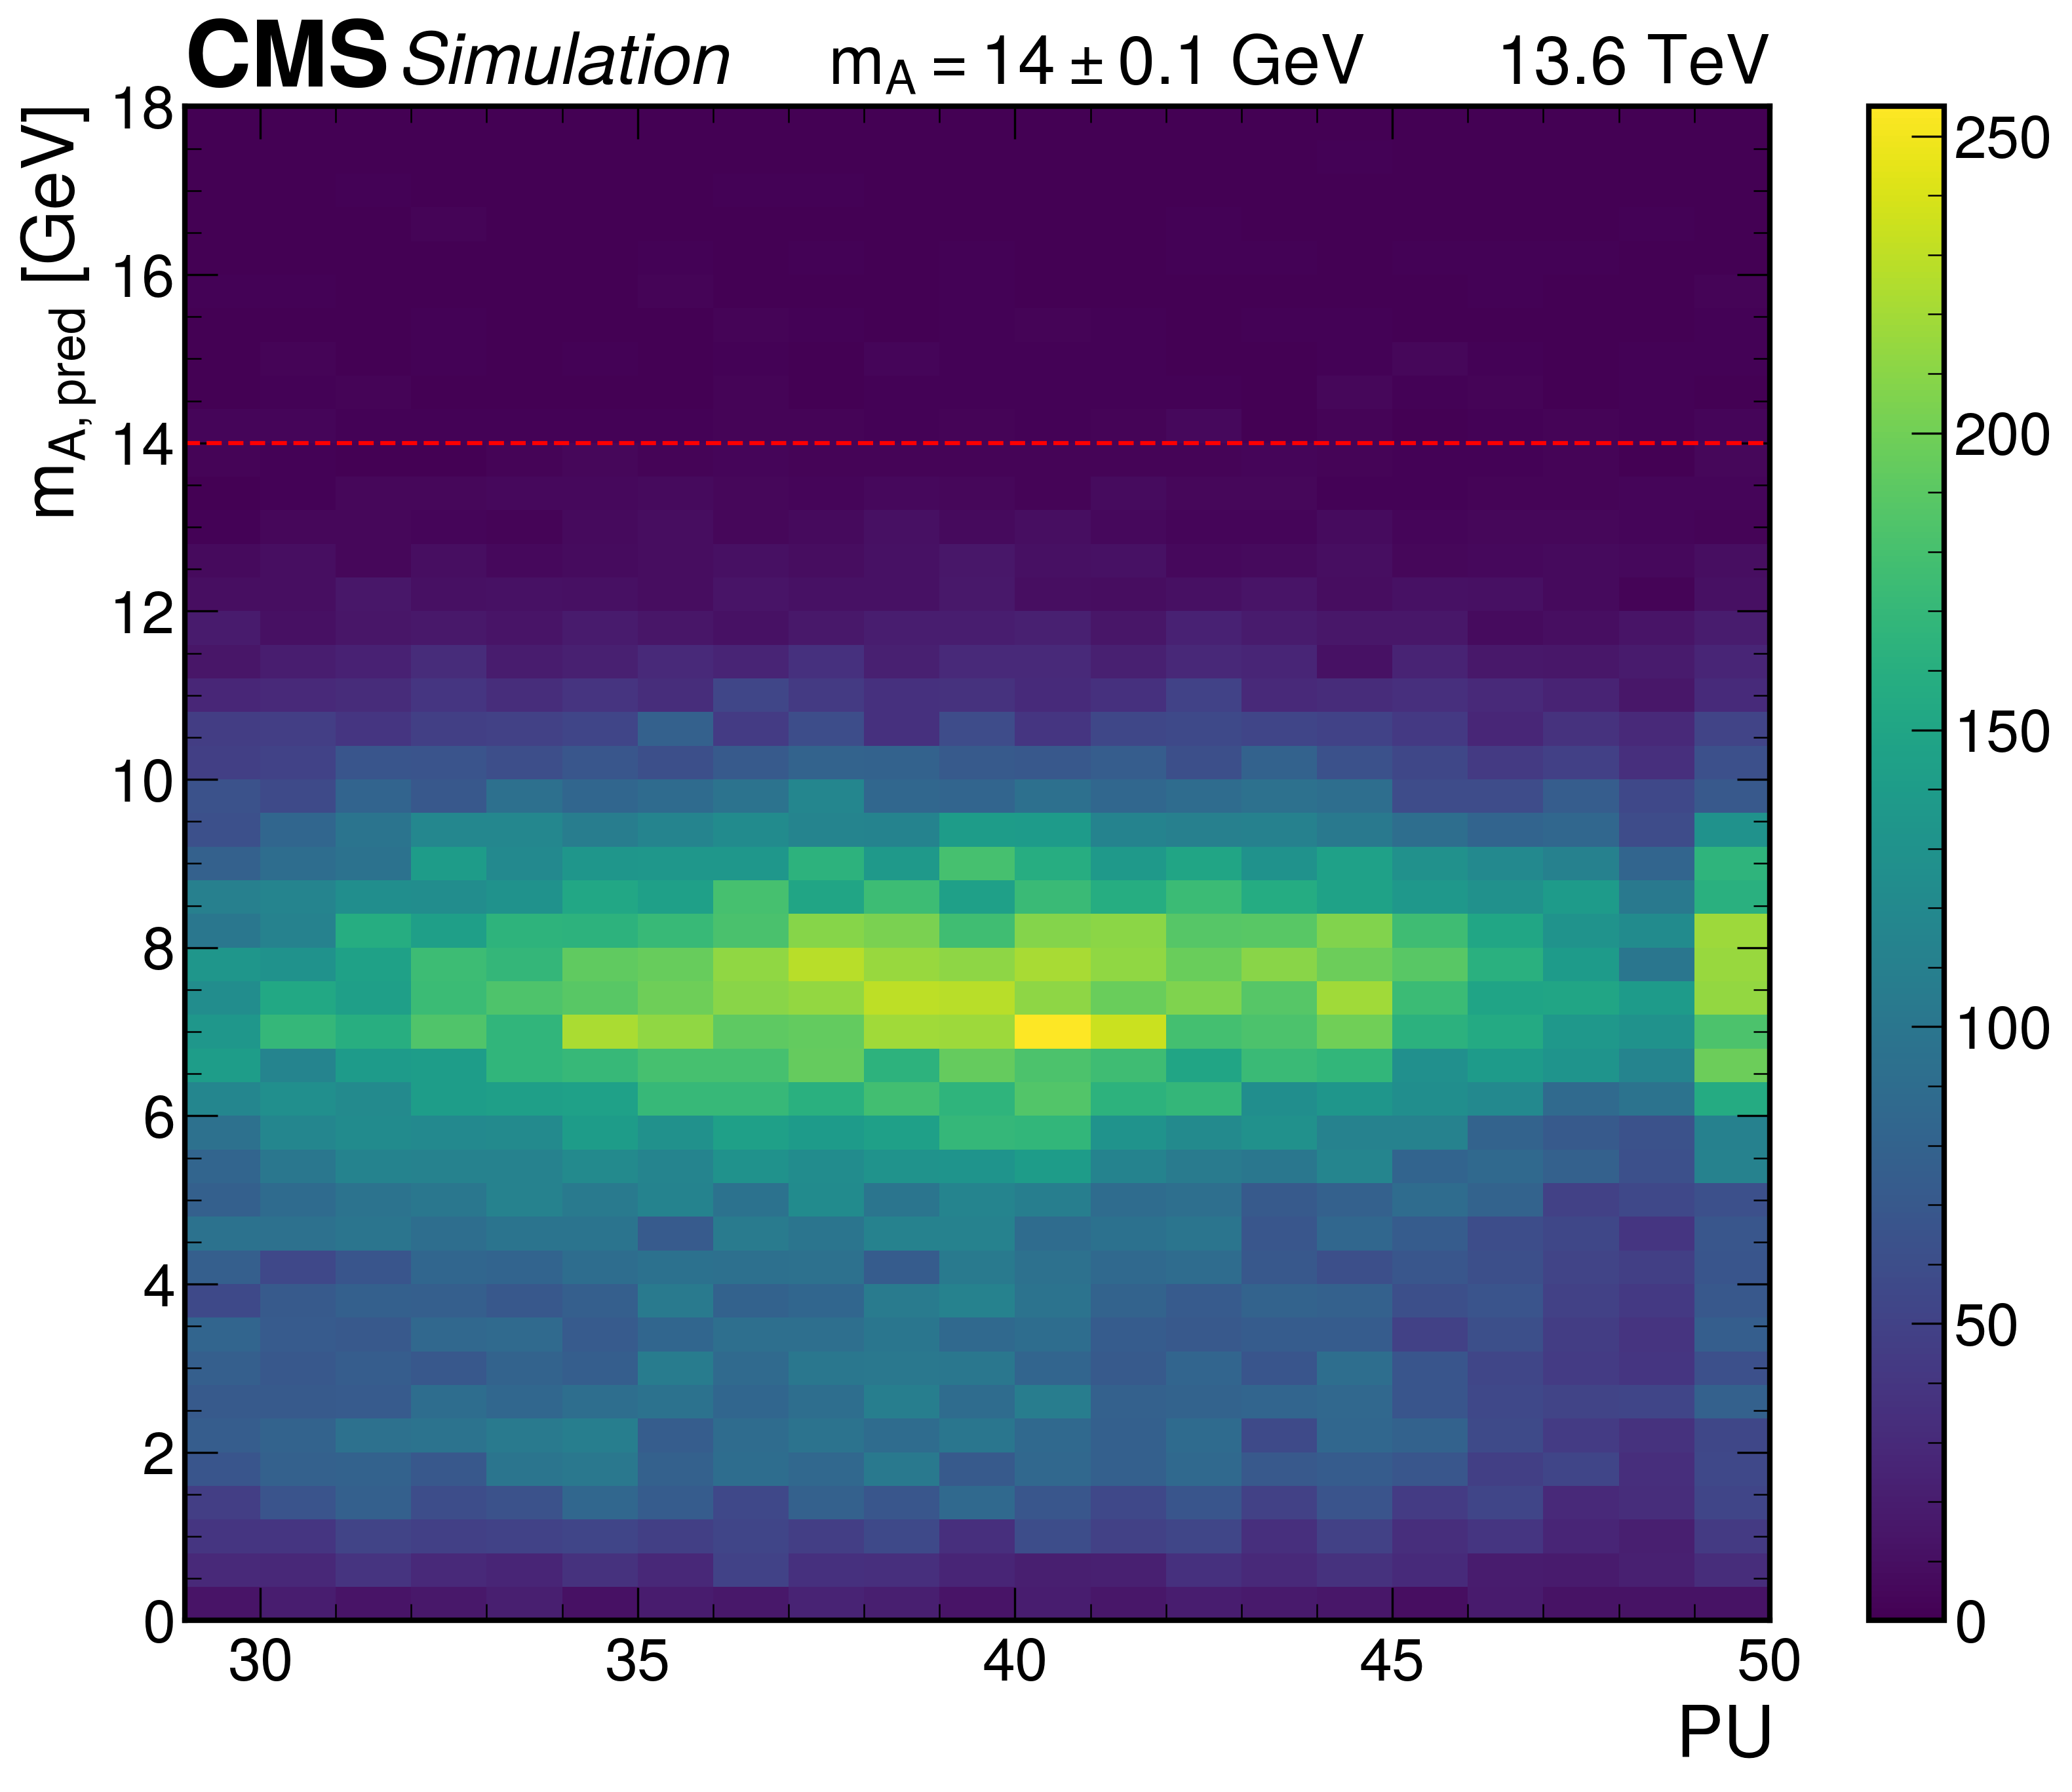

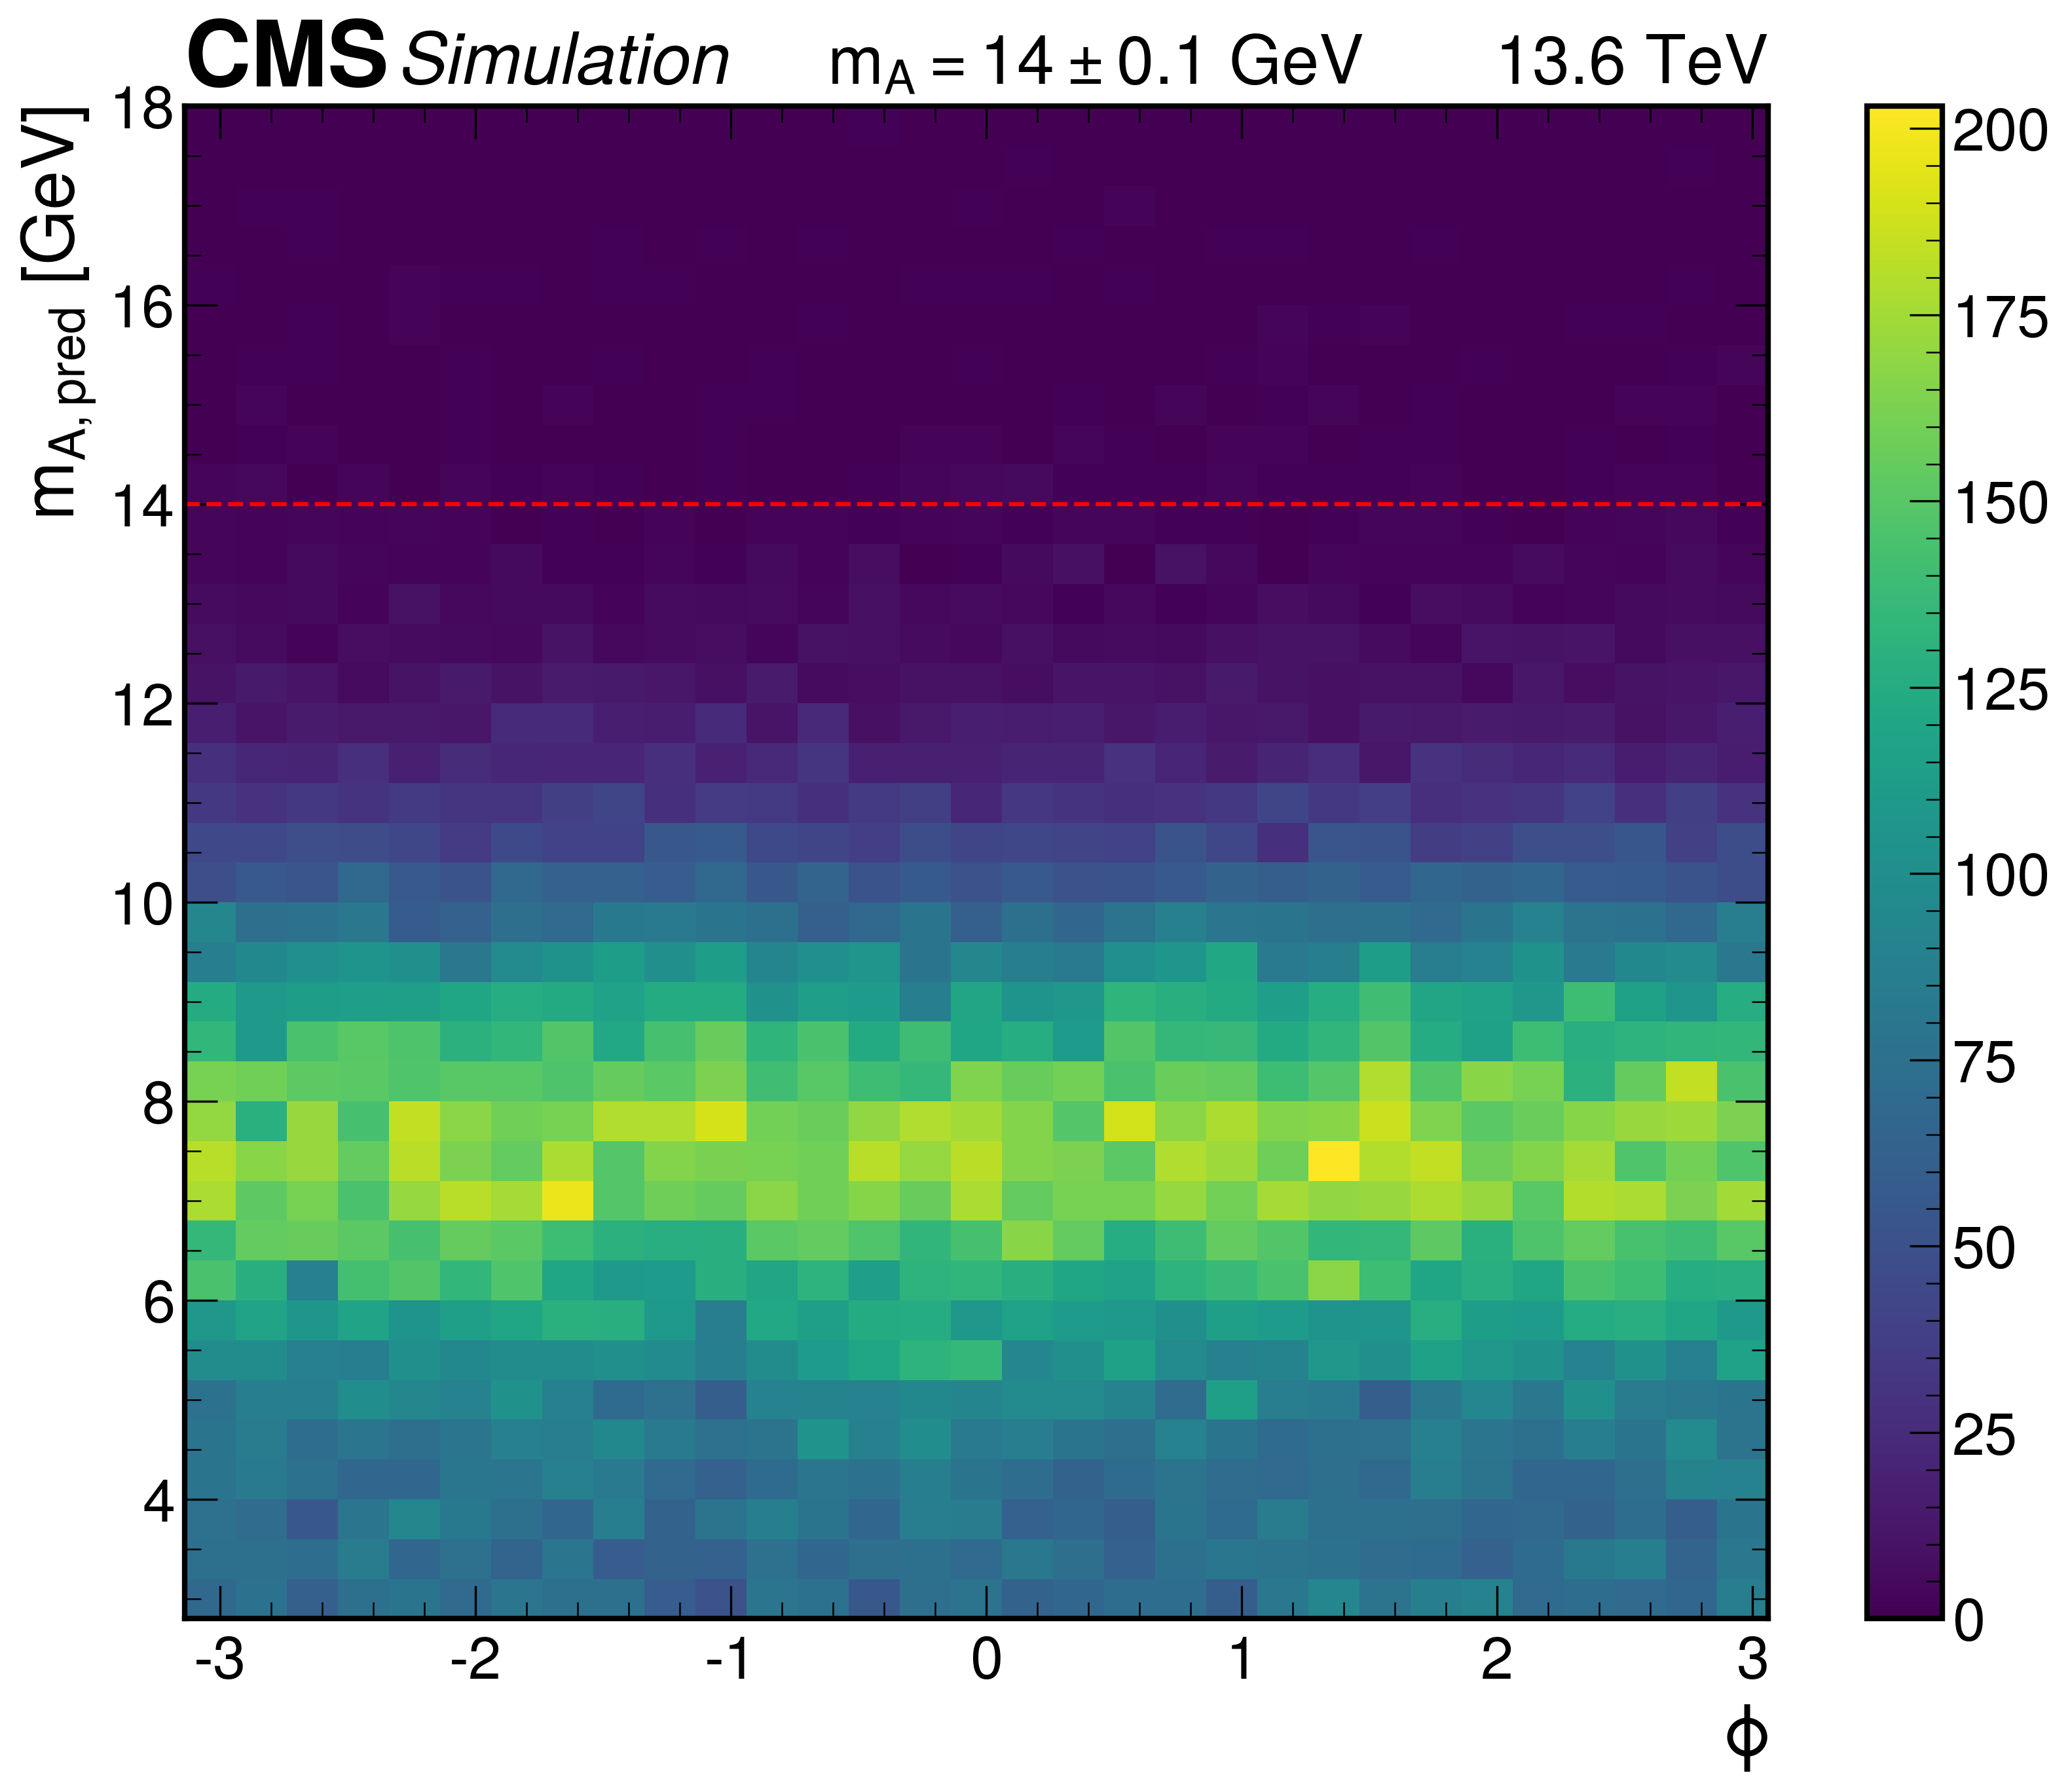

In [19]:
epoch=100
data_dir ='../analysis_run3/Data_for_plots/mass_regression_test_data/jupyter_notebook_new/ResNet_min_max_scaling_mN1p2To22_chanel_test_m0_22_unbiased_map'


model_dirs = ['13_ResNet_map_Tracks_pt_Tracks_dZSig_Tracks_d0Sig_ECAL_energy_HBHE_energy_Pix_1_Pix_2_Pix_3_Pix_4_Tib_1_Tib_2_Tob_1_Tob_2']

# model_dirs = model_dirs[0]

# Plot settings
m0_min, m0_max, bin_size = -1.2, 25.1, 0.4
bins = np.arange(m0_min, m0_max, bin_size)
colors = ['red', 'green', 'blue', 'orange', 'purple','grey']





Mass='14'
mass = {'3p7':3.7, '8':8, '14':14}.get(Mass, None)
# print(mass)
# Loop over models
for i, model_dir in enumerate(model_dirs):
    try:
        data_file = glob.glob(f"{data_dir}/{model_dir}/Validation_ATo2Tau_mass{Mass}_epoch_{epoch}_inference.pkl")[0]
        with open(data_file, "rb") as f:
            data = pickle.load(f)
            # print('keys', data.keys())
        m_pred = data["m_pred"].flatten()
        # m_pred = corrected_pred_mean(data["m_pred"].flatten())
        # m_pred = corrected_pred_mode(data["m_pred"].flatten())
        m_true = data["m_true"]
        jet_mass = data["jet_mass"] 
        jet_pt = data["jet_pt"].flatten()
        jet_e = data["jet_e"]
        a_pt = data["a_pt"].flatten()
        a_eta = data["a_eta"].flatten()
        a_phi = data["a_phi"].flatten()
        TaudR = data["TaudR"].flatten()
        nVtx = data["nVtx"].flatten()
        
        
        ch = model_dir.split('_')[0]
        # print(ch)
        # fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        # ax.hist(nVtx, color='r', alpha=0.3, label='PU')
        
        fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
        plt.hist2d(a_pt, m_pred, bins=[np.arange(30,301,5), np.arange(0,18.1, .4)], cmap='gist_heat_r')
        # plt.hist(a_pt,bins=np.arange(30,301,5), color='r', label='Pt_true')
        plt.xlabel(r'${P_{T,A}}$ [GeV]')
        plt.ylabel(r'${m_{A, pred}}$ [GeV]')
        plt.colorbar().set_label(label='' )
        plt.axhline(mass,  color='r', linestyle='--')
        hep.cms.label(llabel=f"Simulation", rlabel=rf"$m_A = {mass} \pm 0.1$ GeV       13.6 TeV", loc=0, ax=ax)
        # plt.savefig(f'{out_dir}/m_pred_vs_a_pt_{ch}_channel_aTo2Tau_mass_{Mass}_GeV.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
        plt.show() 
        
        
        fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
        plt.hist2d(a_eta, m_pred, bins=[np.arange(-1.3,1.4,.1), np.arange(0,18.1, .4)])
        plt.xlabel(r'${\eta_A}$')
        plt.ylabel(r'${m_{A, pred}}$ [GeV]')
        plt.colorbar().set_label(label='' )
        plt.axhline(mass,  color='r', linestyle='--')
        hep.cms.label(llabel=f"Simulation", rlabel=rf"$m_A = {mass} \pm 0.1$ GeV       13.6 TeV", loc=0, ax=ax)
        plt.savefig(f'{out_dir}/m_pred_vs_a_eta_{ch}_channel_aTo2Tau_mass_{Mass}_GeV.pdf.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
        plt.show() 
        
        fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
        plt.hist2d(nVtx, m_pred, bins=[np.arange(29,51,1), np.arange(0,18.1, .4)])
        plt.xlabel(r'${PU}$')
        plt.ylabel(r'${m_{A, pred}}$ [GeV]')
        plt.colorbar().set_label(label='' )
        plt.axhline(mass,  color='r', linestyle='--')
        hep.cms.label(llabel=f"Simulation", rlabel=rf"$m_A = {mass} \pm 0.1$ GeV       13.6 TeV", loc=0, ax=ax)
        # plt.savefig(f'{out_dir}/m_pred_vs_PU_{ch}_channel_aTo2Tau_mass_{Mass}_GeV.pdf.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
        plt.show() 
        
        
        fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
        plt.hist2d(a_phi, m_pred, bins=[np.arange(-3.14,3.141,0.2), np.arange(2.8,18.1, .4)])
        plt.xlabel(r'$\phi$')
        plt.ylabel(r'${m_{A, pred}}$ [GeV]')
        plt.colorbar().set_label(label='' )
        plt.axhline(mass,  color='r', linestyle='--')
        hep.cms.label(llabel=f"Simulation", rlabel=rf"$m_A = {mass} \pm 0.1$ GeV       13.6 TeV", loc=0, ax=ax)
        # plt.savefig(f'{out_dir}/m_pred_vs_a_phi_{ch}_channel_aTo2Tau_mass_{Mass}_GeV.pdf.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
        plt.show() 
        
        
        # fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        # norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
        # plt.hist2d(TaudR, m_pred, bins=[np.arange(0,1.5,0.1), np.arange(2.8,18.1, .4)])
        # plt.xlabel(r'$\Delta$R')
        # plt.ylabel(r'${m_{A, pred}}$ [GeV]')
        # plt.colorbar().set_label(label='' )
        # plt.axhline(mass,  color='r', linestyle='--')
        # hep.cms.label(llabel=f"Simulation", rlabel=rf"$m_A = {mass} \pm 0.1$ GeV       13.6 TeV", loc=0, ax=ax)
        # # plt.savefig(f'{out_dir}m_pred_vs_TaudR.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
        # plt.show() 
        
        # fig, ax = plt.subplots(figsize=(13,10),dpi=300)
        # norm = mcolors.TwoSlopeNorm(vmin=1000, vmax = 5000, vcenter=3000)
        # plt.hist2d(jet_pt, m_pred, bins=[np.arange(20,201,5), np.arange(2.8,18.1, .4)])
        # plt.xlabel(r'${P_{T,jet}}$ [GeV]')
        # plt.ylabel(r'${m_{A, pred}}$ [GeV]')
        # plt.colorbar().set_label(label='' )
        # plt.axhline(mass,  color='r', linestyle='--')
        # hep.cms.label(llabel=f"Simulation", rlabel=rf"$m_A = {mass} \pm 0.1$ GeV       13.6 TeV", loc=0, ax=ax)
        # # plt.savefig(f'{out_dir}m_pred_vs_jet_pt.pdf', bbox_inches='tight',dpi=300, facecolor = "w")
        # plt.show() 
        

    except IndexError:
        print(f"❌ No data file found for: {model_dir}")
    except Exception as e:
        print(f"⚠️ Error loading {model_dir}: {e}")

# # Final touches
# plt.xlabel(r"$m_A$ [GeV]")
# plt.ylabel("Normalized Events / 0.4 GeV")
# plt.legend(loc='upper right', fontsize=9)
# hep.cms.label(llabel="Simulation", rlabel=rf"E2E Prediction          13.6 TeV", loc=0, ax=ax)
# plt.axvline(mass,  color='green', linestyle='--', label='m_true',  )
# plt.tight_layout()
# # plt.savefig(f'{out_dir}/mass_reg_channel_test_validation_data_prediction.pdf',facecolor='w',dpi=300)
# plt.show()
